In [243]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [244]:
df = pd.read_csv('train.csv')

In [245]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [246]:
df.shape  

(1460, 81)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [248]:
100*df.isnull().mean() # drop_columns= ['LotFrontage','Alley','MasVnrType','PoolQC','Fence','MiscFeature']   drop_rows

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## Drop Columns with more than 5% null values and no value addition

In [249]:
df.drop(columns=['LotFrontage','MasVnrType'] ,axis=1 ,inplace=True)

In [250]:
impute_cols = df.columns[100*df.isnull().mean()>0].tolist()
impute_cols

['Alley',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Imputing null rows that have value with 'not present' for categorical variables

In [251]:
impute_cat_cols=['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']


In [252]:
for col in impute_cat_cols:
    df[col].fillna('Not_Present',inplace=True)

In [253]:
df.columns[100*df.isnull().mean()>0].tolist()

['MasVnrArea', 'Electrical', 'GarageYrBlt']

### Imputing null rows for numerical variable with more than 5% null

In [254]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['GarageYrBlt'].fillna(0,inplace=True) # impute with 0 since null for this column means that the garage is not presetn

### Drop rows with null value in numerical columms

In [255]:
df.dropna(axis=0, inplace=True)

In [256]:
df.columns[100*df.isnull().mean()>0].tolist()

[]

### drop unnessary columns

In [257]:
df.drop(columns=['Id'],axis=1, inplace=True)

In [258]:
df.nunique()

MSSubClass         15
MSZoning            5
LotArea          1072
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          752
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBa

In [259]:
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x : float(str(x)))

In [260]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x : str(x))
df['OverallQual'] = df['OverallQual'].apply(lambda x : str(x))
df['OverallCond'] = df['OverallCond'].apply(lambda x : str(x))
df['FullBath'] = df['FullBath'].apply(lambda x : str(x))
df['HalfBath'] = df['HalfBath'].apply(lambda x : str(x))

df['BsmtFullBath'] = df['BsmtFullBath'].apply(lambda x : str(x))
df['BsmtHalfBath'] = df['BsmtHalfBath'].apply(lambda x : str(x))

df['BedroomAbvGr'] = df['BedroomAbvGr'].apply(lambda x : str(x))
df['KitchenAbvGr'] = df['KitchenAbvGr'].apply(lambda x : str(x))
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].apply(lambda x : str(x))

df['Fireplaces'] = df['Fireplaces'].apply(lambda x : str(x))
df['GarageCars'] = df['GarageCars'].apply(lambda x : str(x))
df['MoSold'] = df['MoSold'].apply(lambda x : str(x))
df['YrSold'] = df['YrSold'].apply(lambda x : str(x))


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   object 
 16  OverallCond    1459 non-null   object 
 17  YearBuilt      1459 non-null   int64  
 18  YearRemodAdd 

In [262]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

In [263]:
cat_cols=df.select_dtypes(include=['object']).columns

In [264]:
num_cols = df.select_dtypes(exclude=['object']).columns

In [265]:
num_cols

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [266]:
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

## Visualizing Numerical Columns


/var/folders/vt/zh6l1p3j34d906_4mtw69cfw0000gn/T/ipykernel_4087/3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

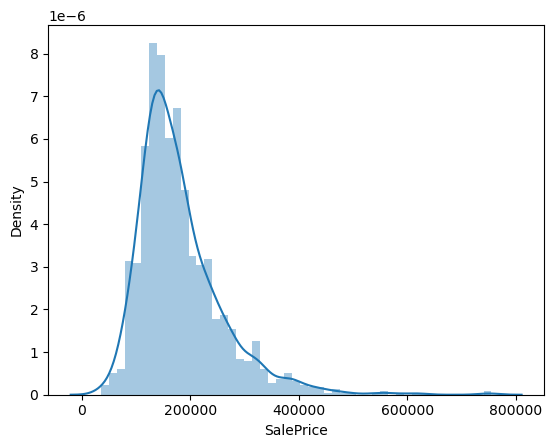

In [267]:
sns.distplot(df['SalePrice'])

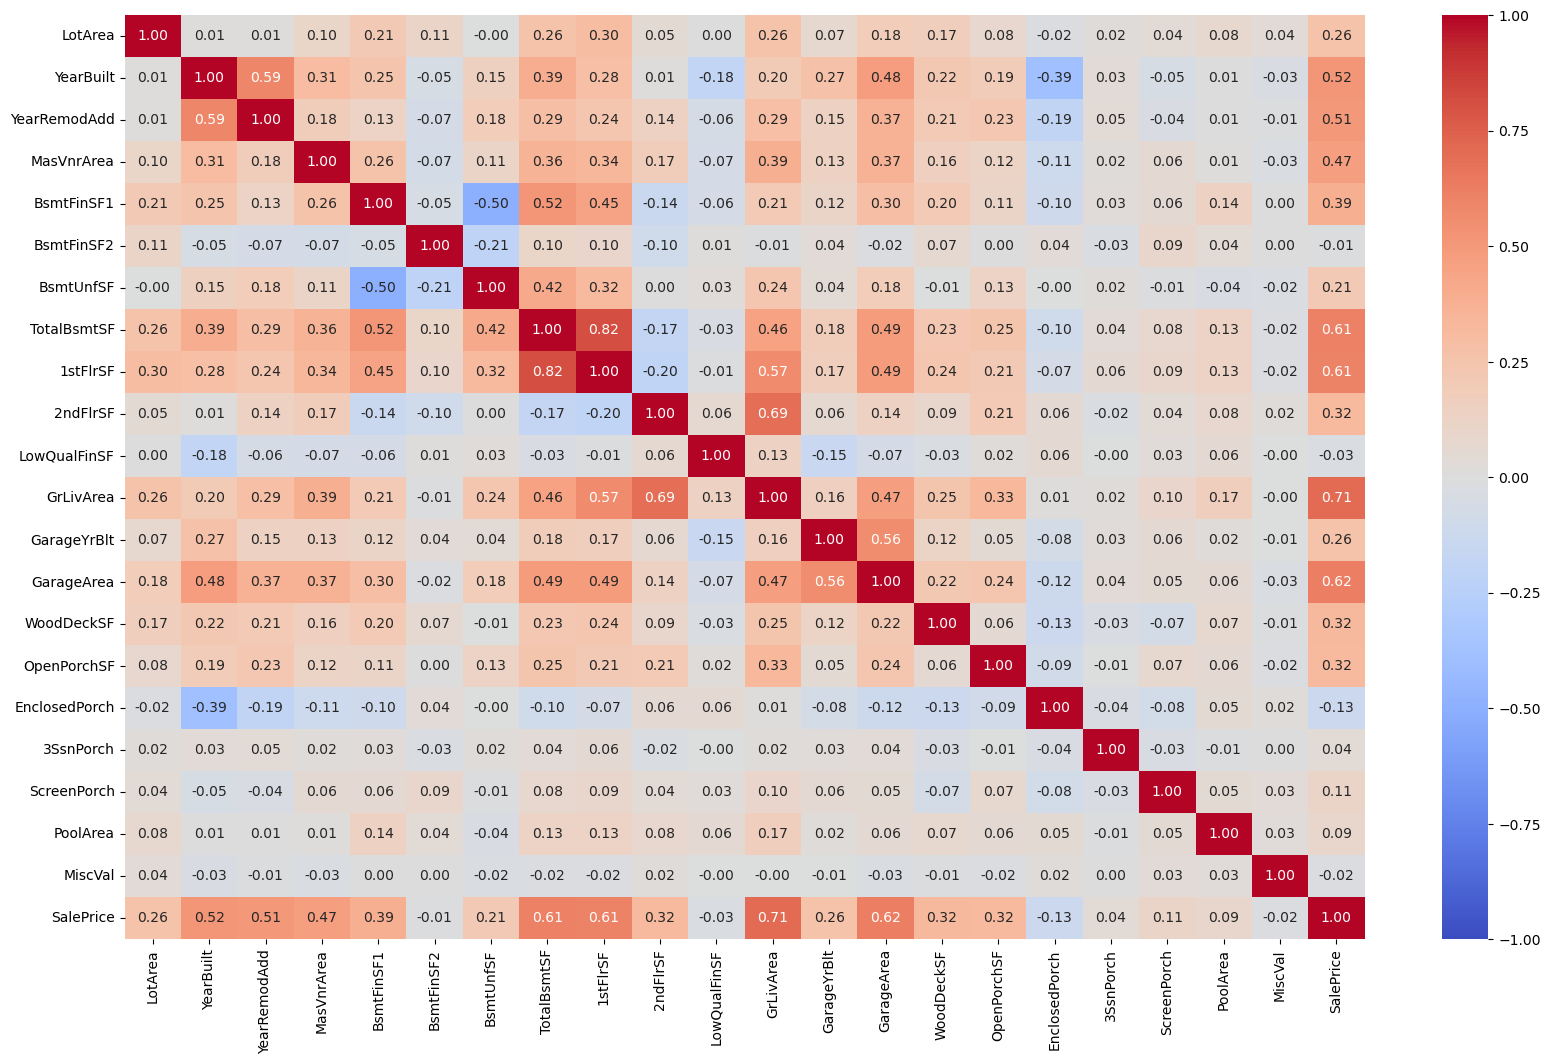

In [268]:
plt.figure(figsize = (20, 12))
sns.heatmap(df[num_cols].corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
 

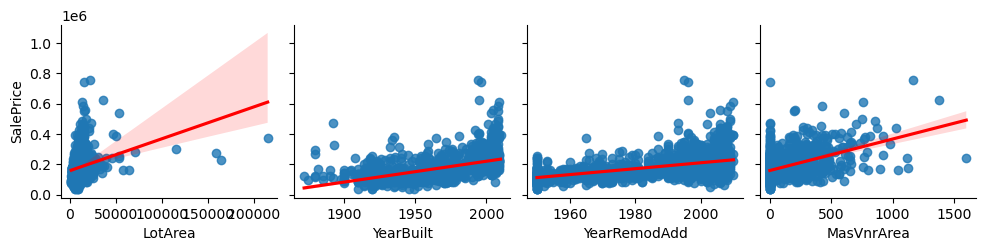

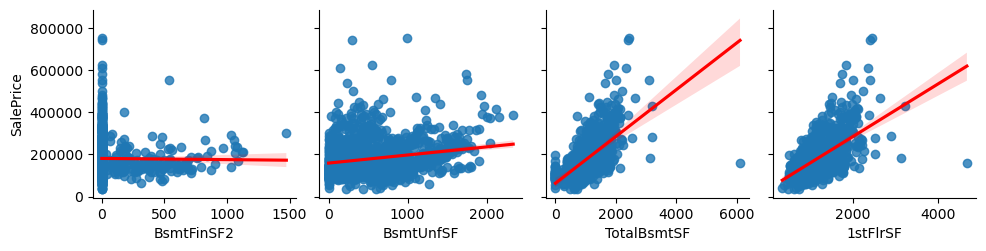

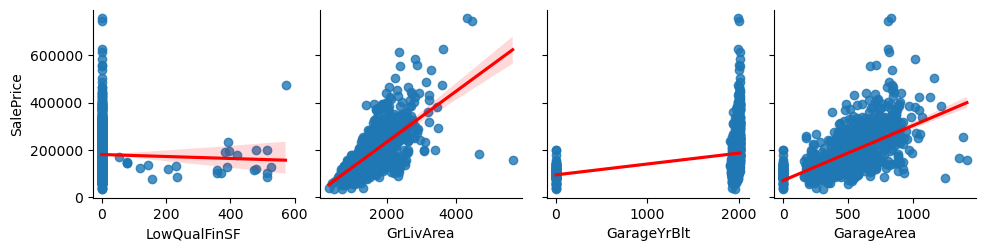

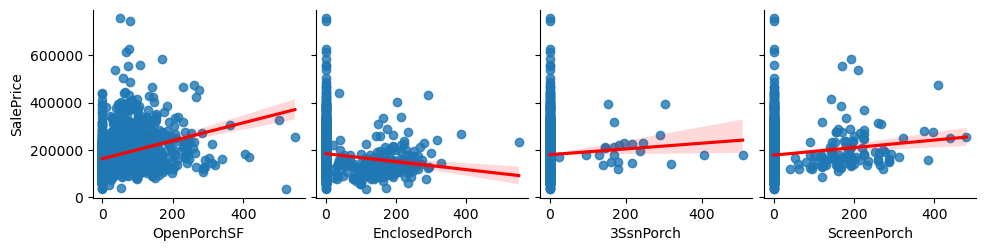

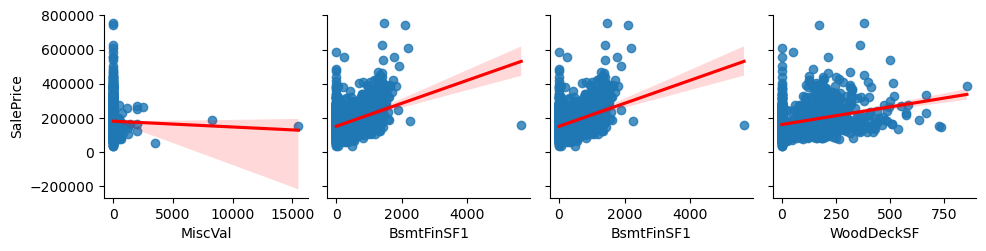

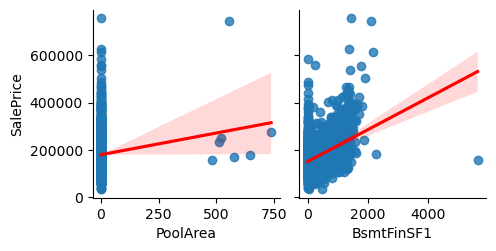

In [269]:
#['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',  
#'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
#'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#'MiscVal', 'SalePrice']

sns.pairplot(df, x_vars=['LotArea','YearBuilt','YearRemodAdd','MasVnrArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(df, x_vars=['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(df, x_vars=['LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(df, x_vars=['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(df, x_vars=['MiscVal','BsmtFinSF1','BsmtFinSF1','WoodDeckSF'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(df, x_vars=['PoolArea','BsmtFinSF1'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'red'}})






/var/folders/vt/zh6l1p3j34d906_4mtw69cfw0000gn/T/ipykernel_4087/622567799.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


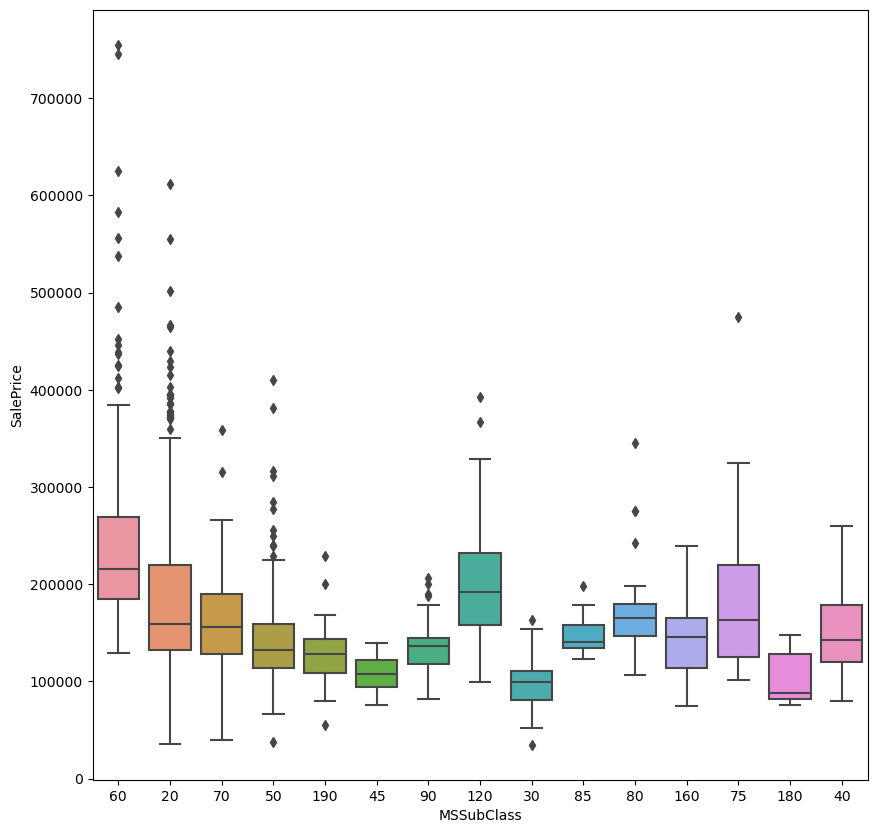

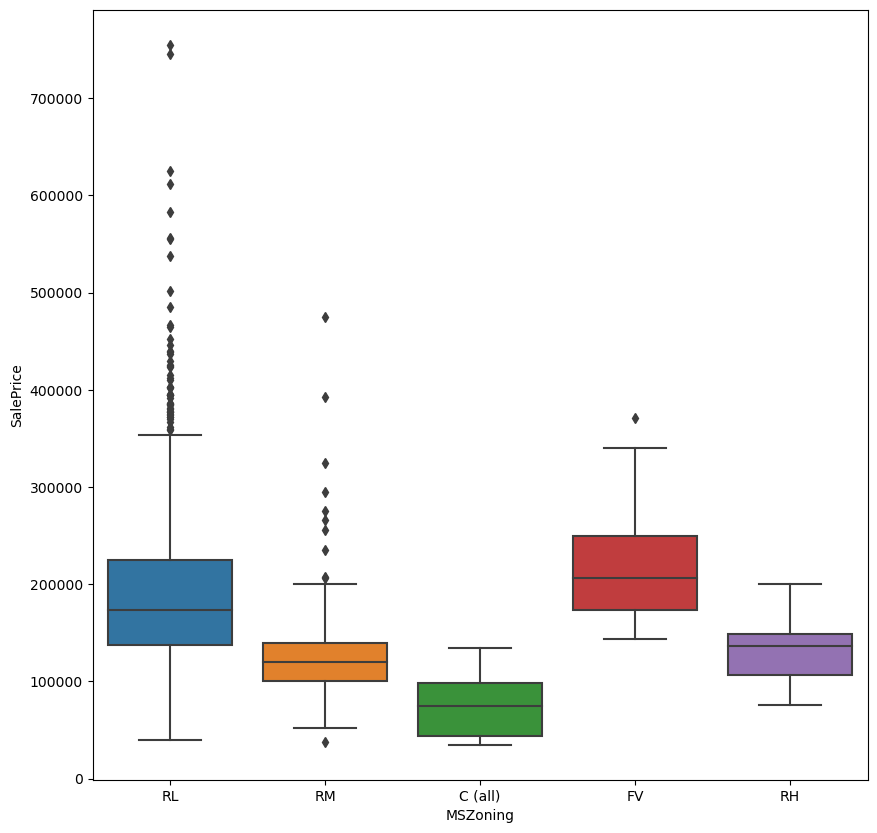

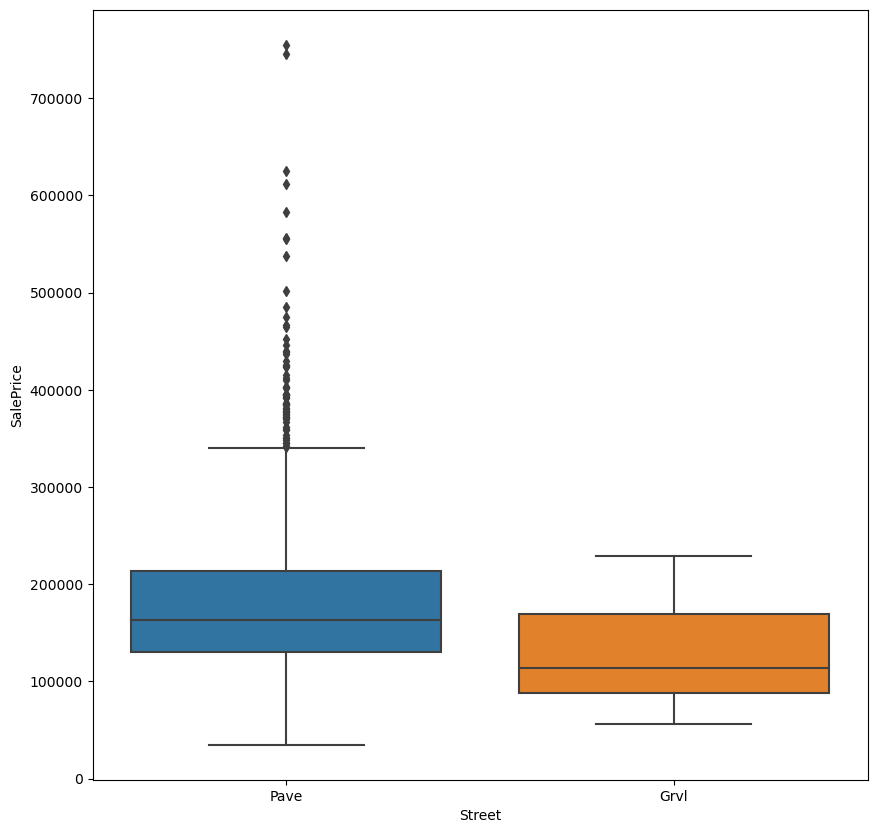

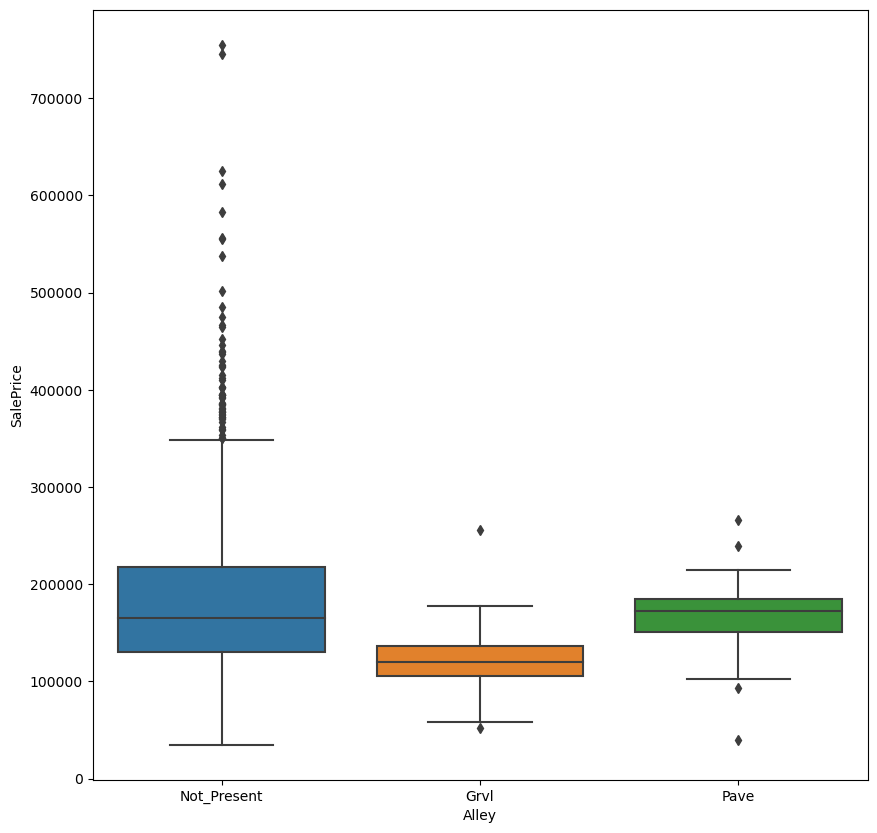

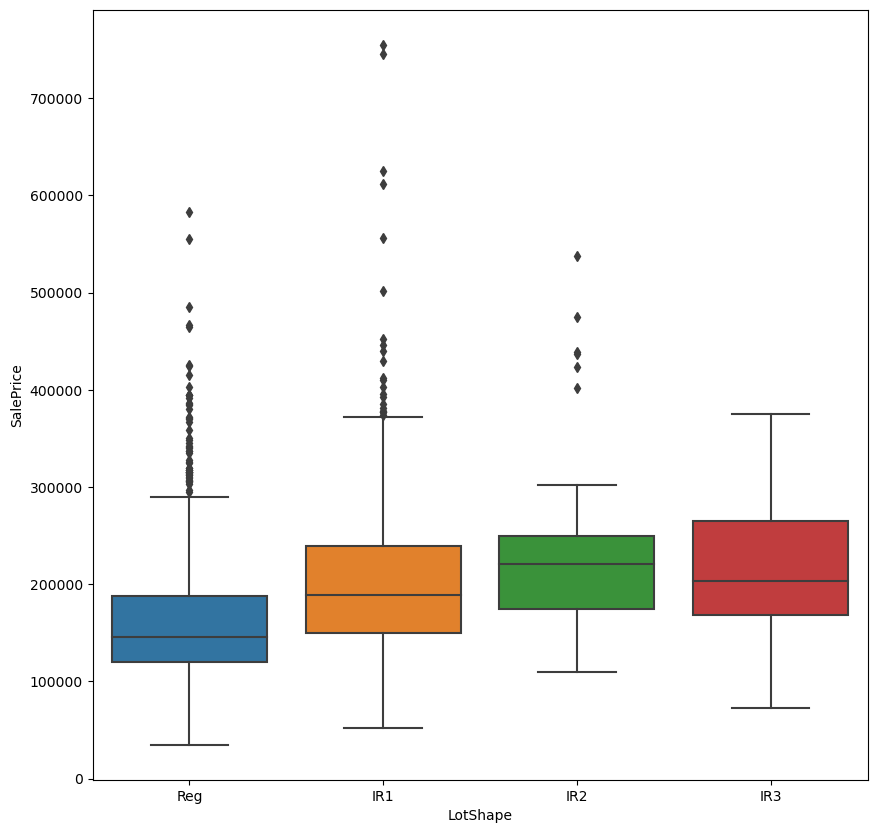

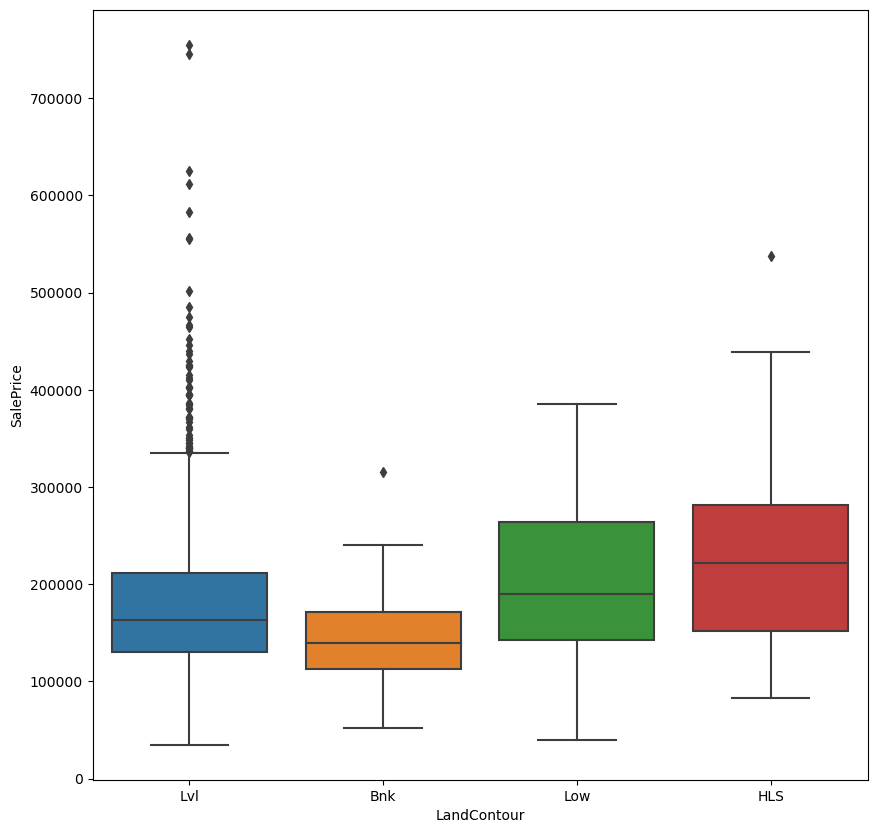

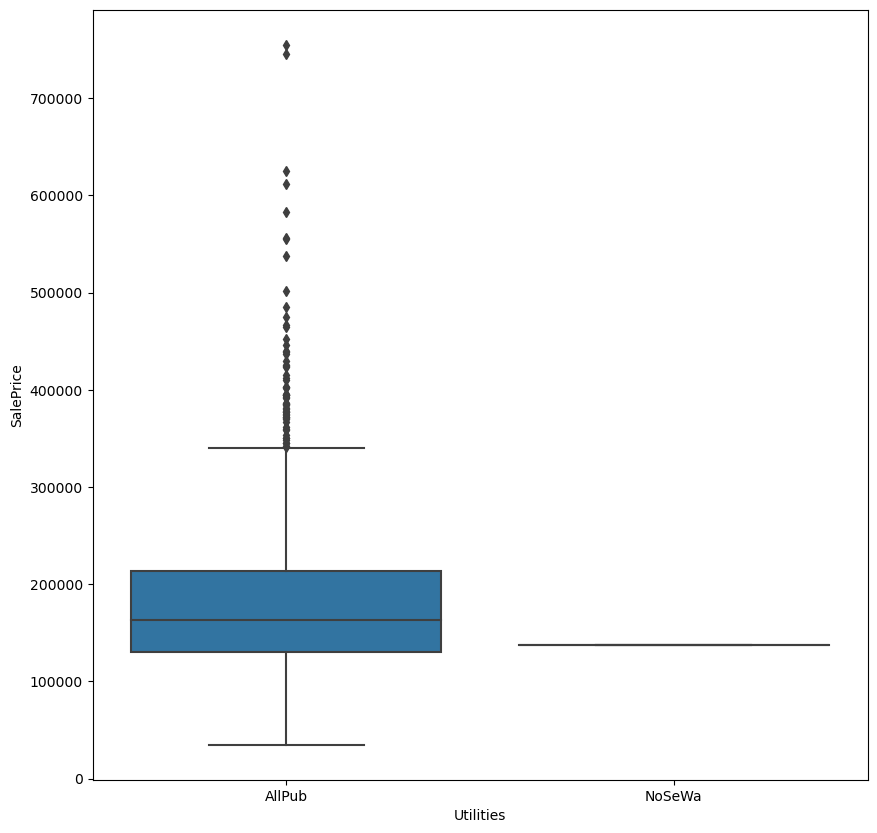

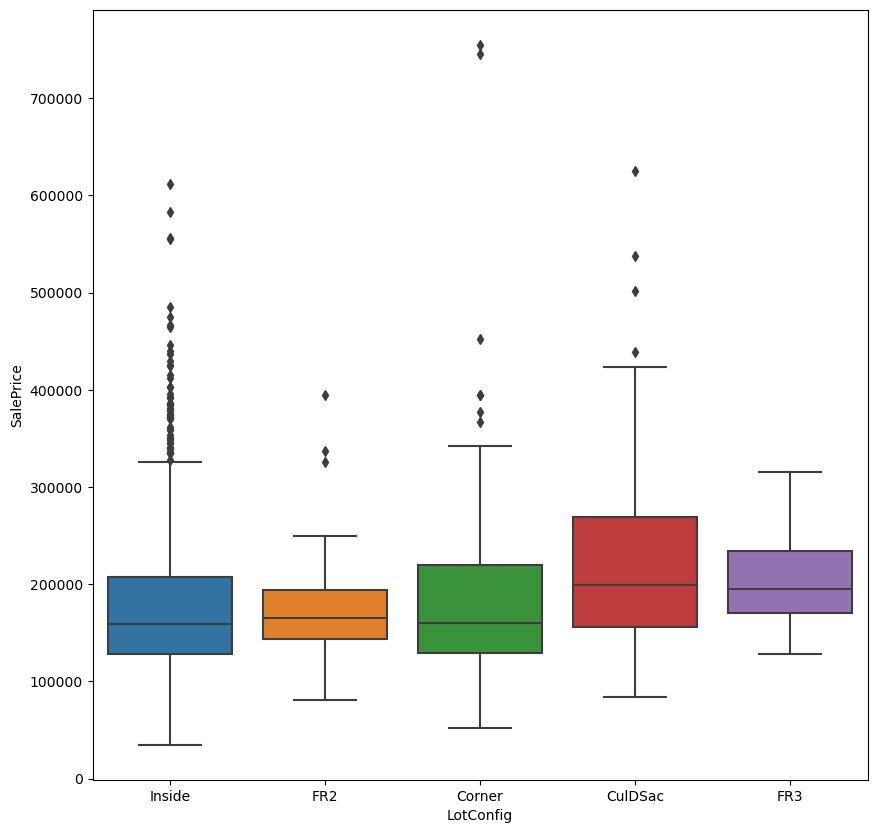

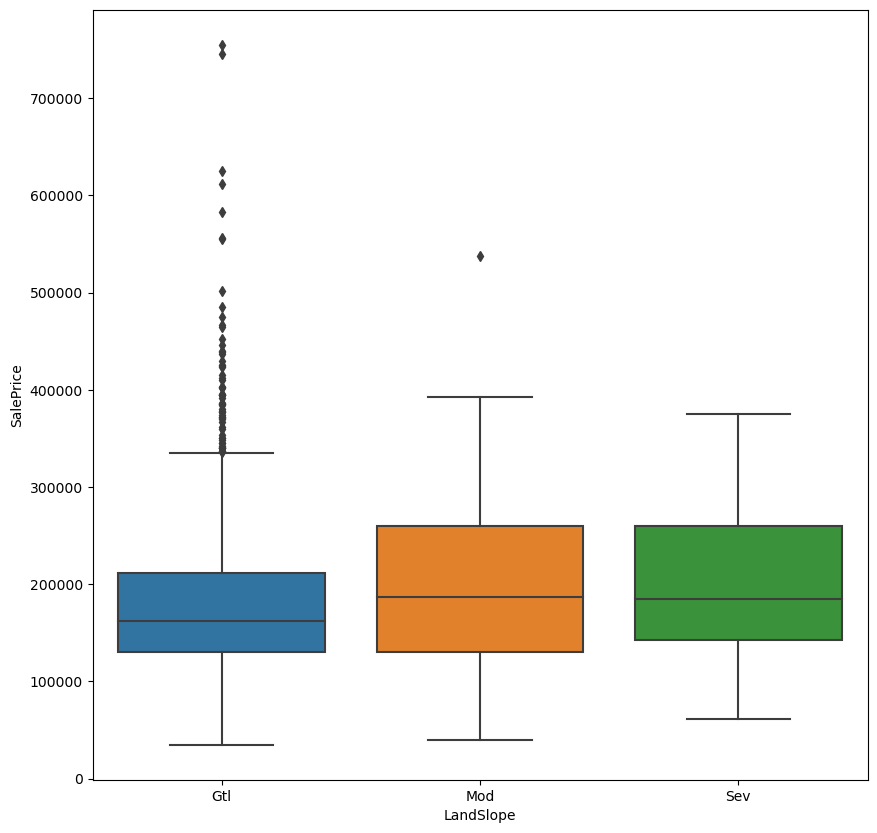

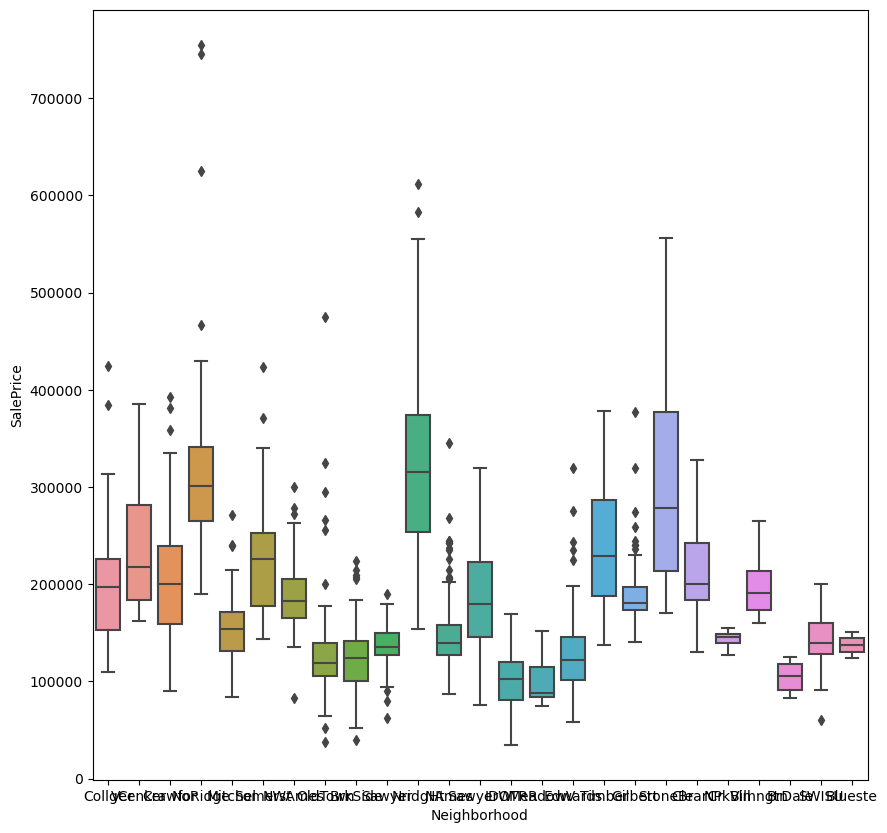

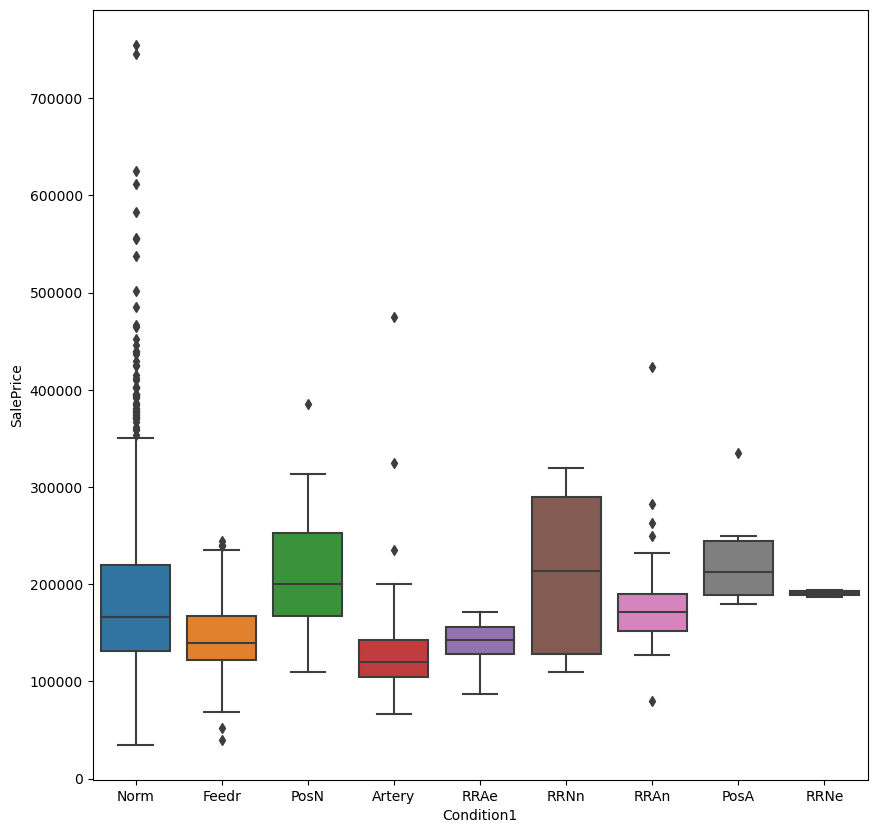

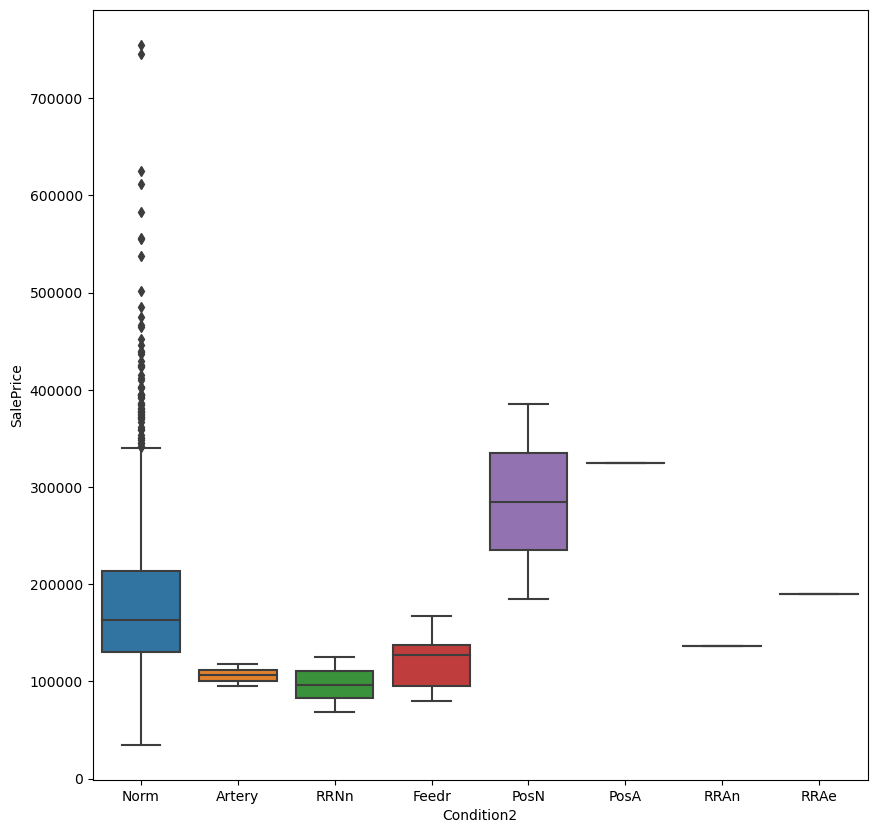

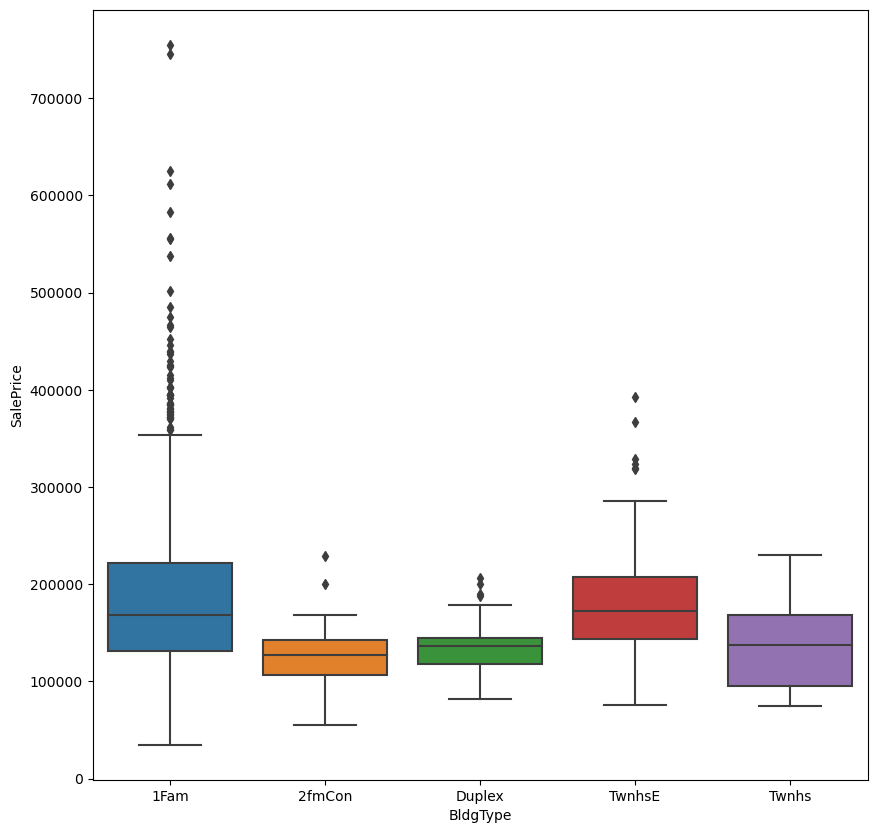

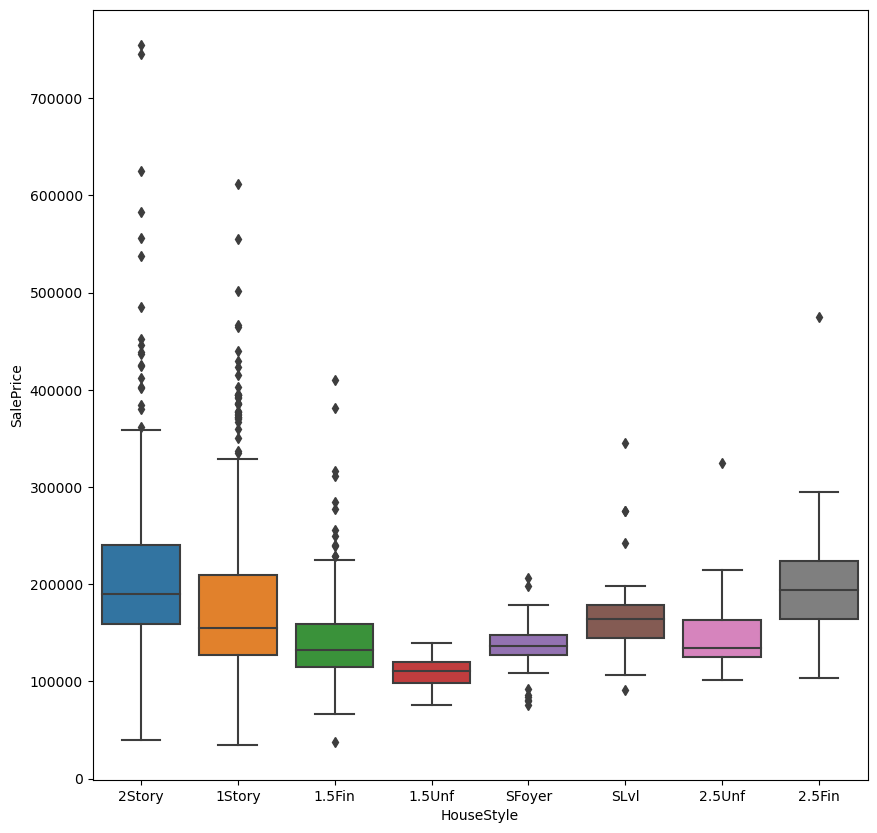

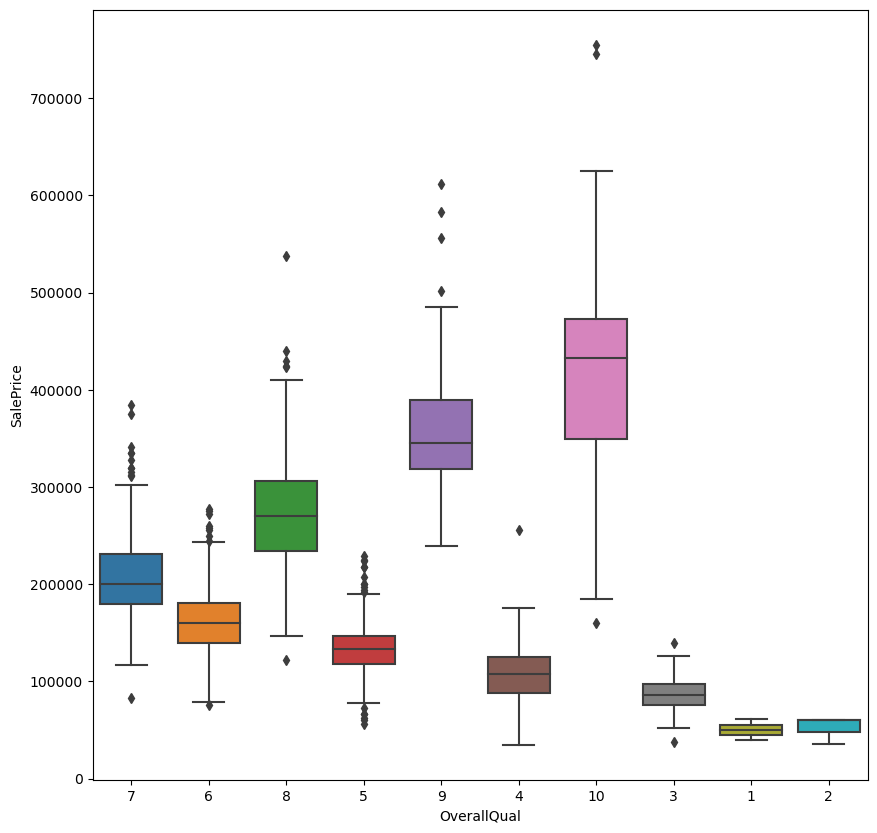

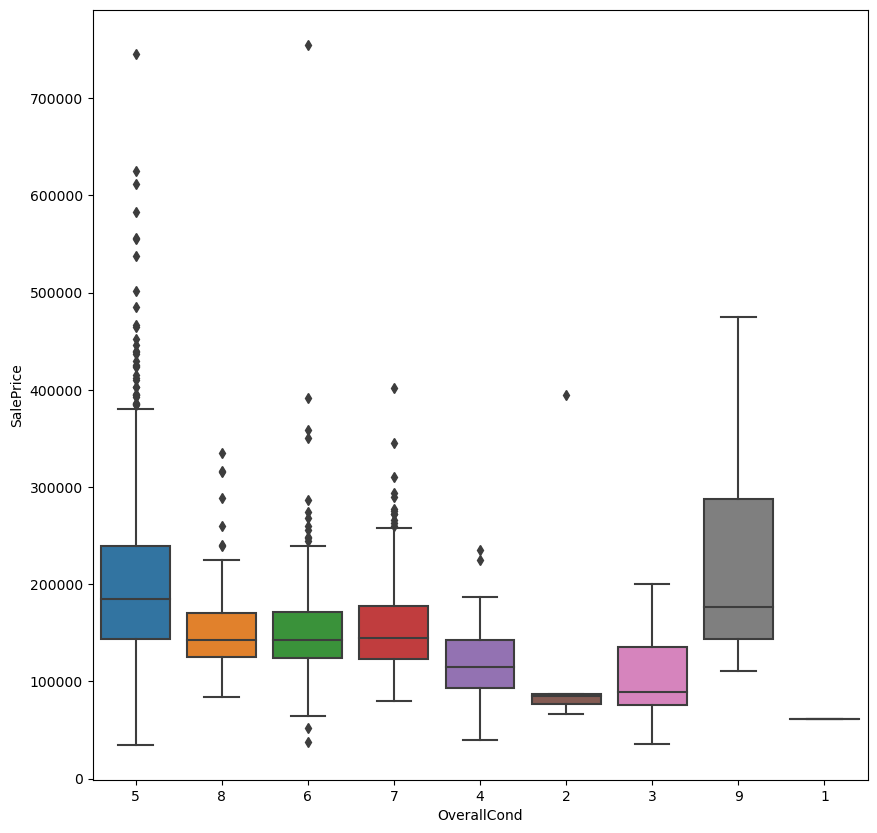

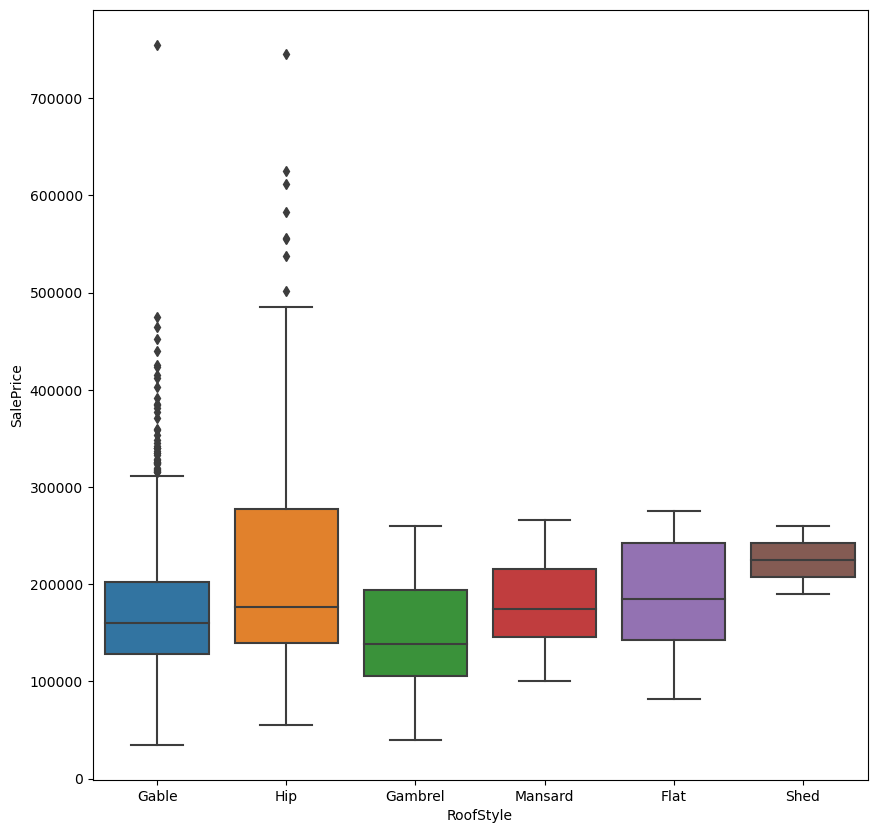

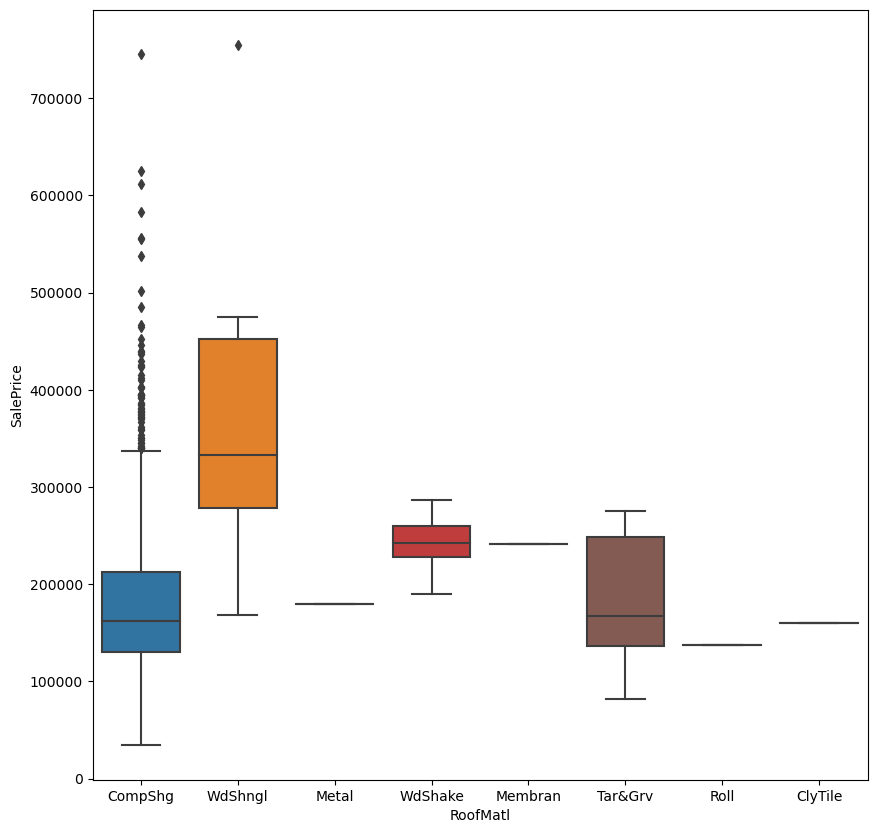

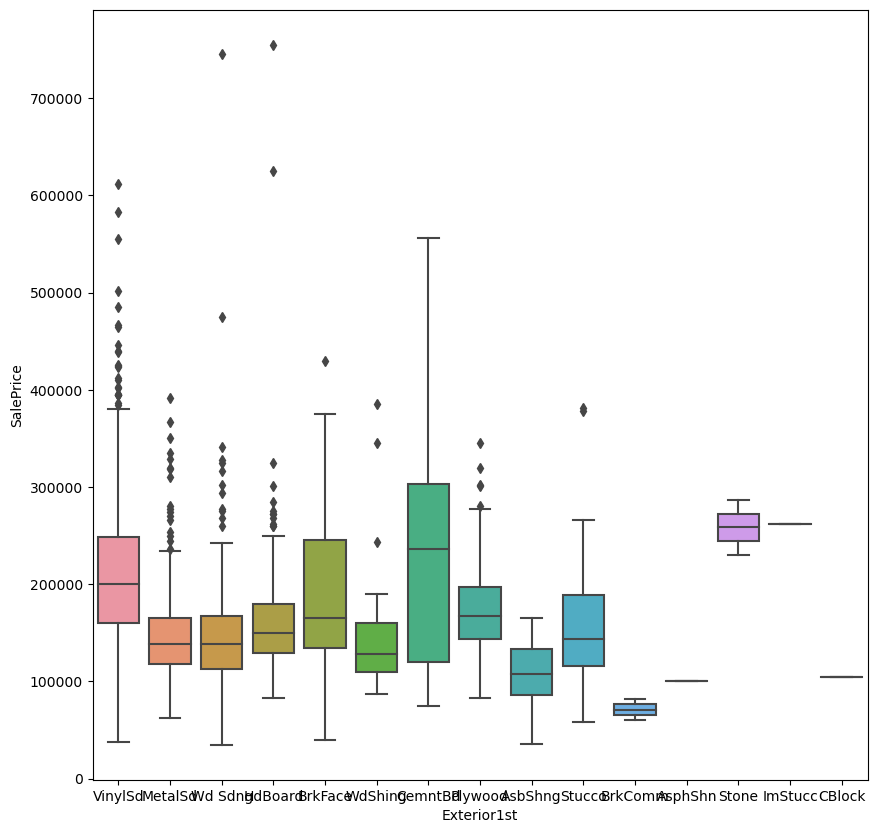

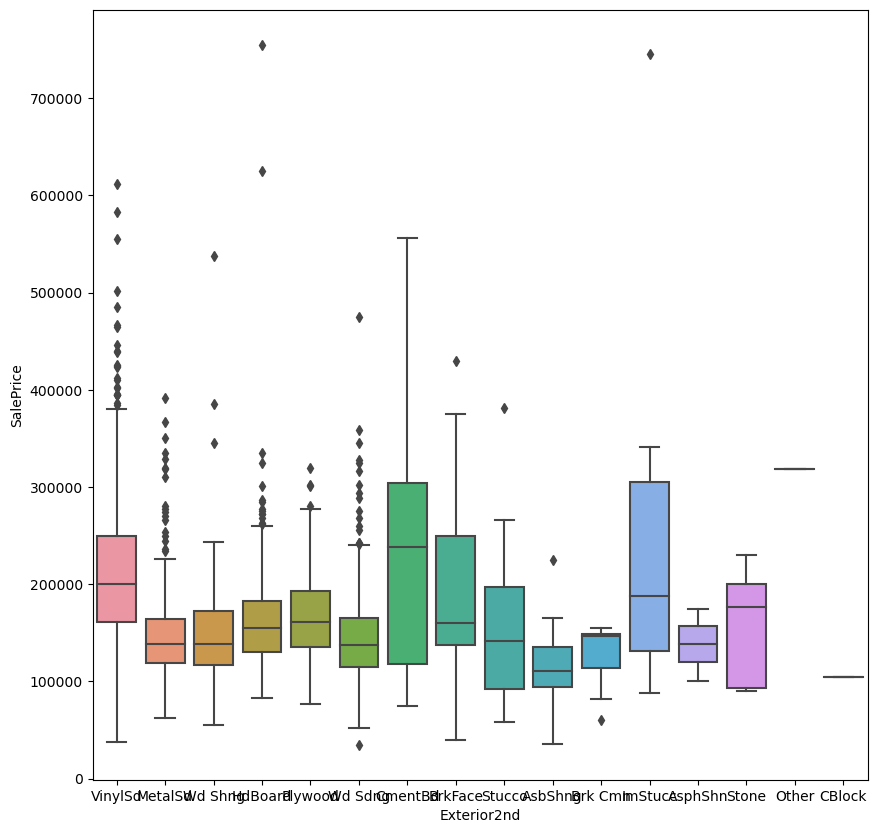

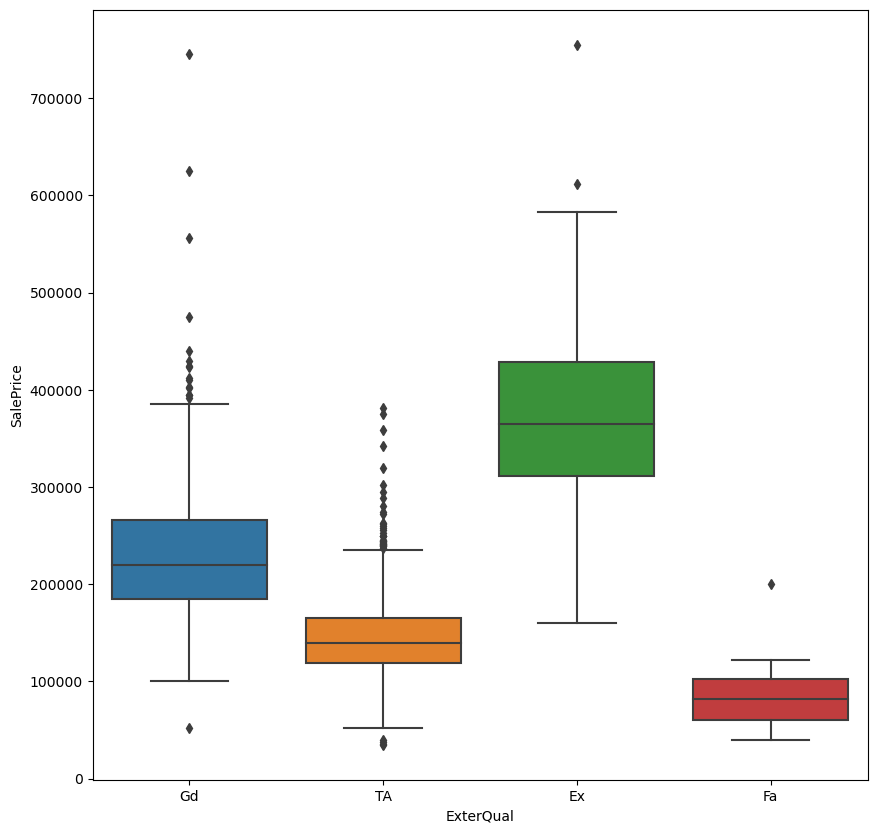

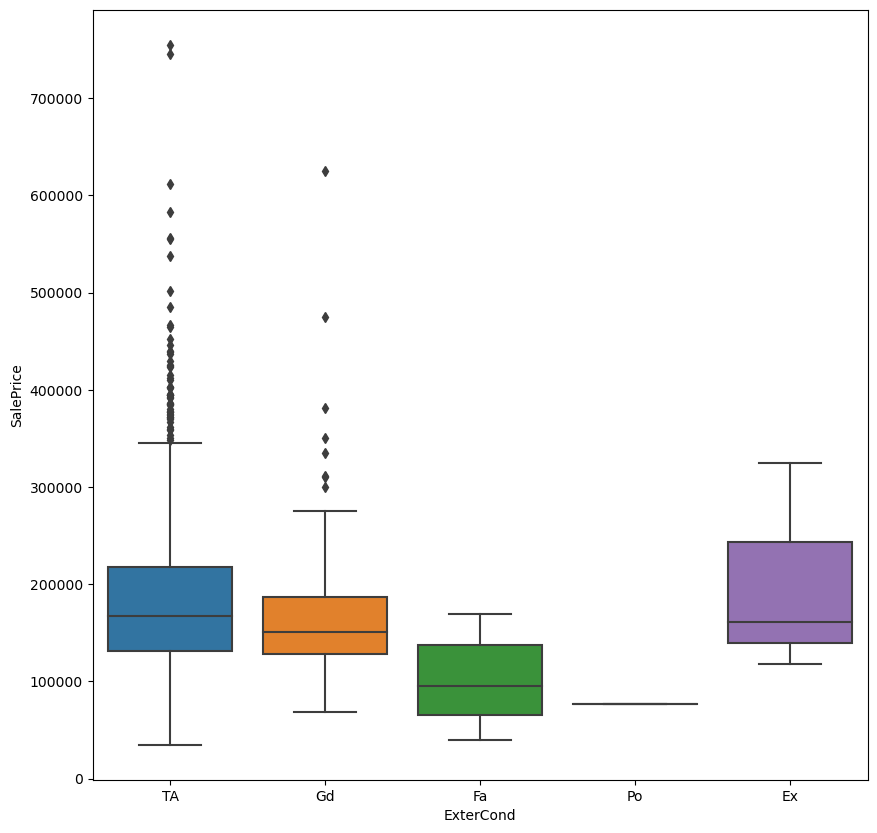

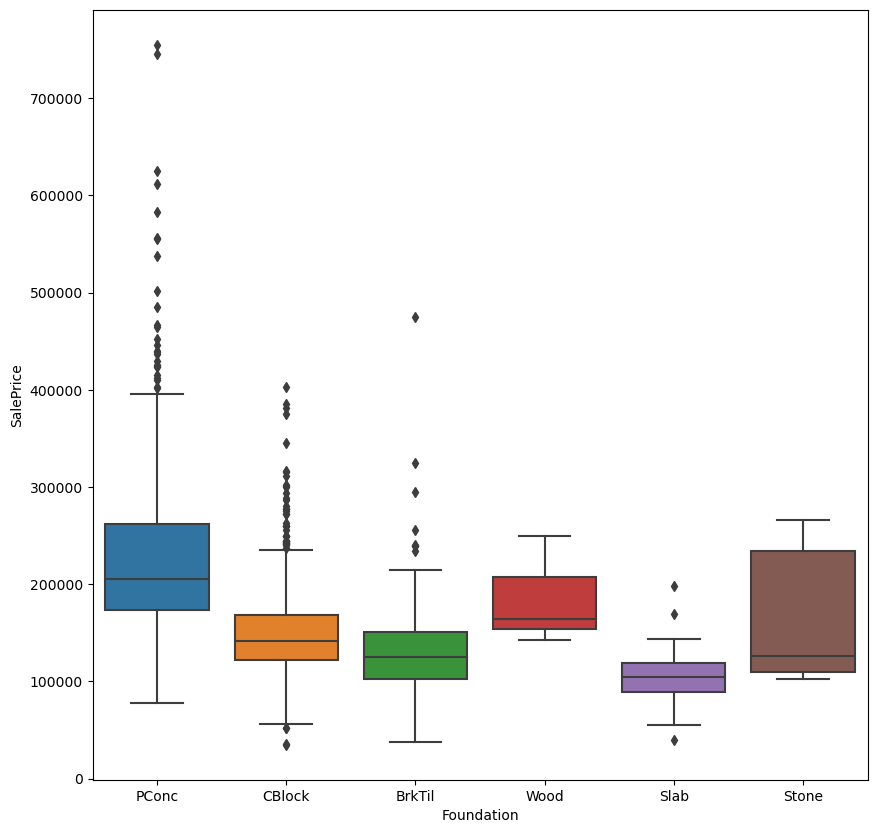

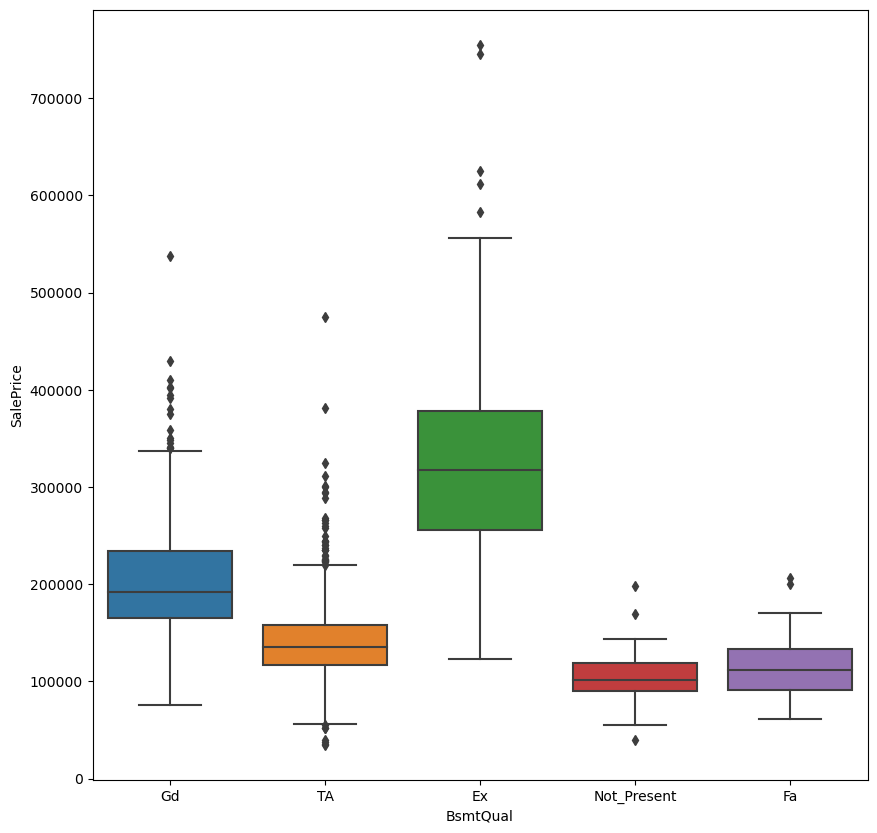

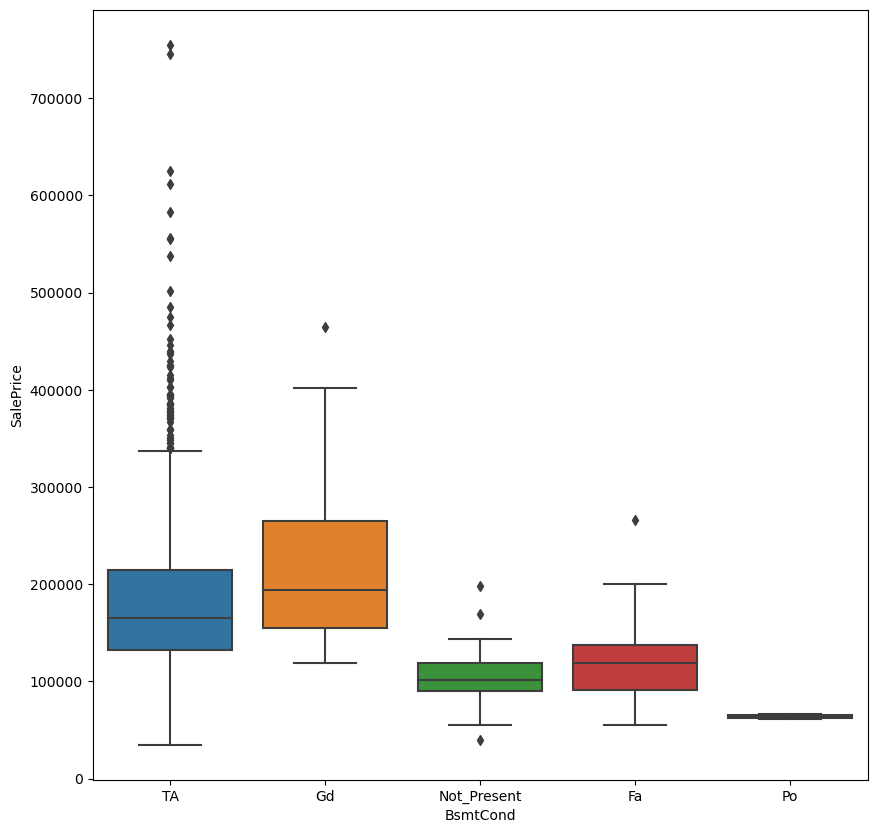

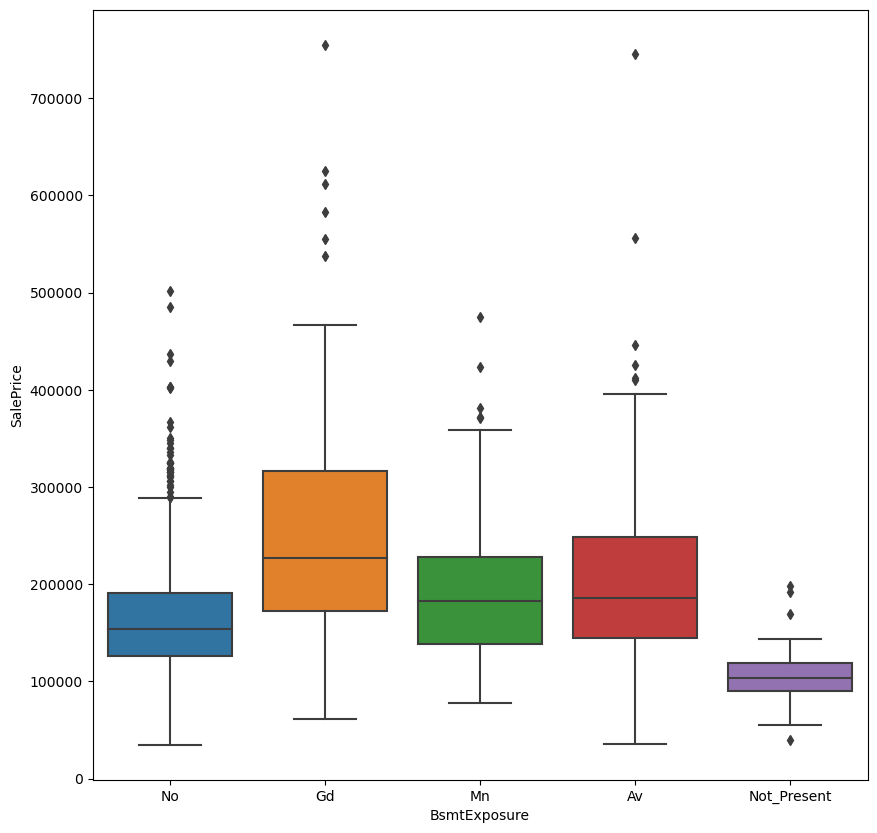

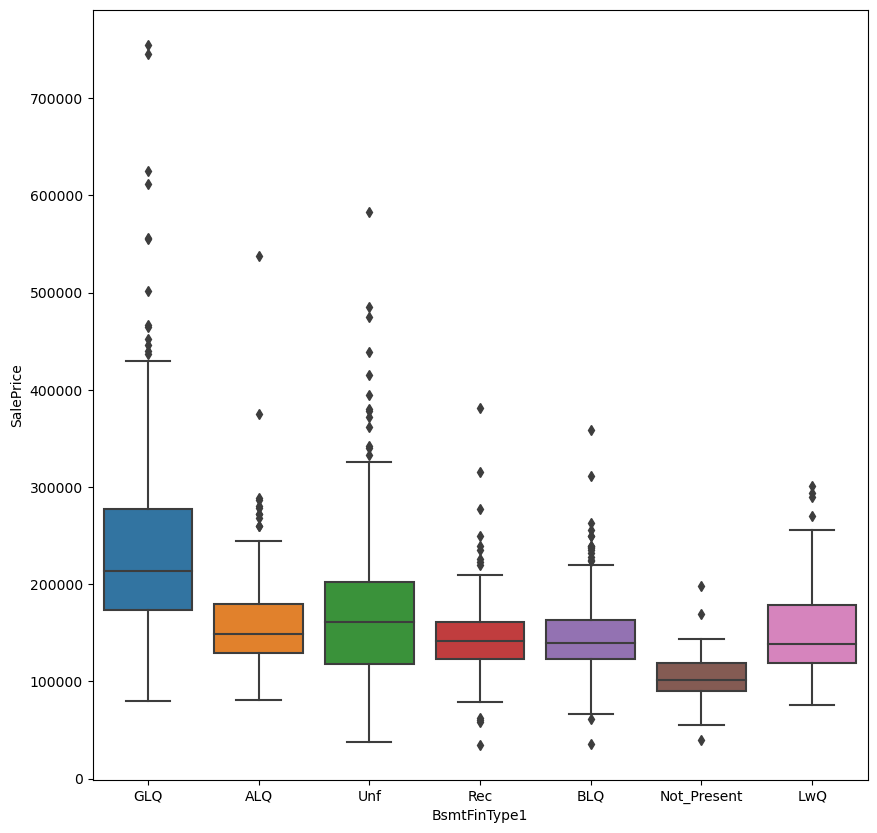

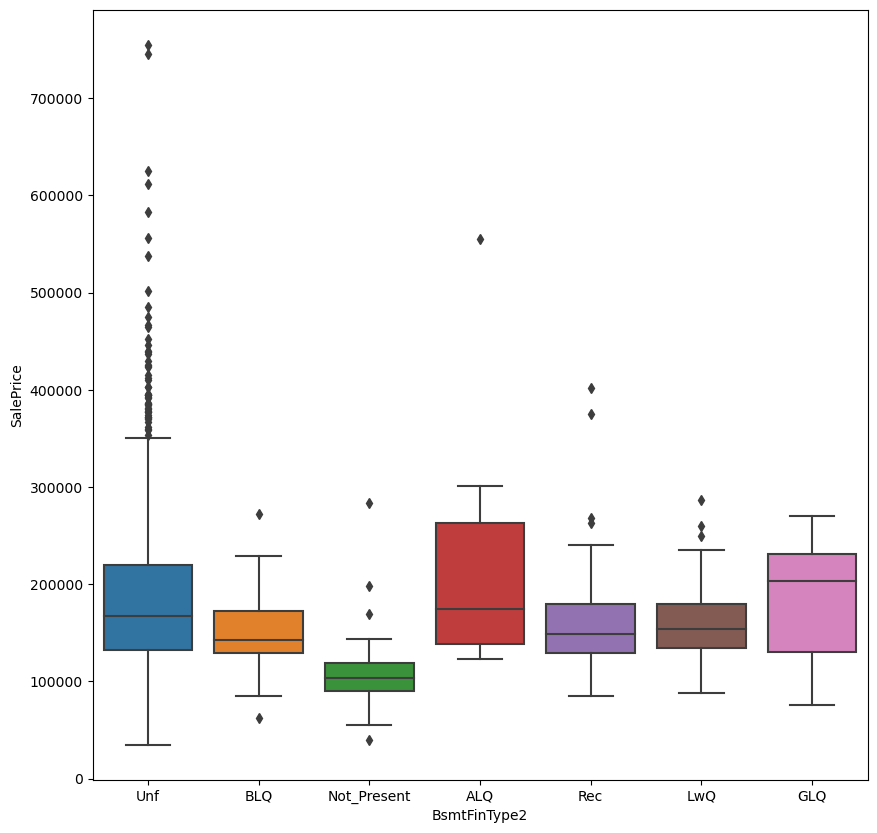

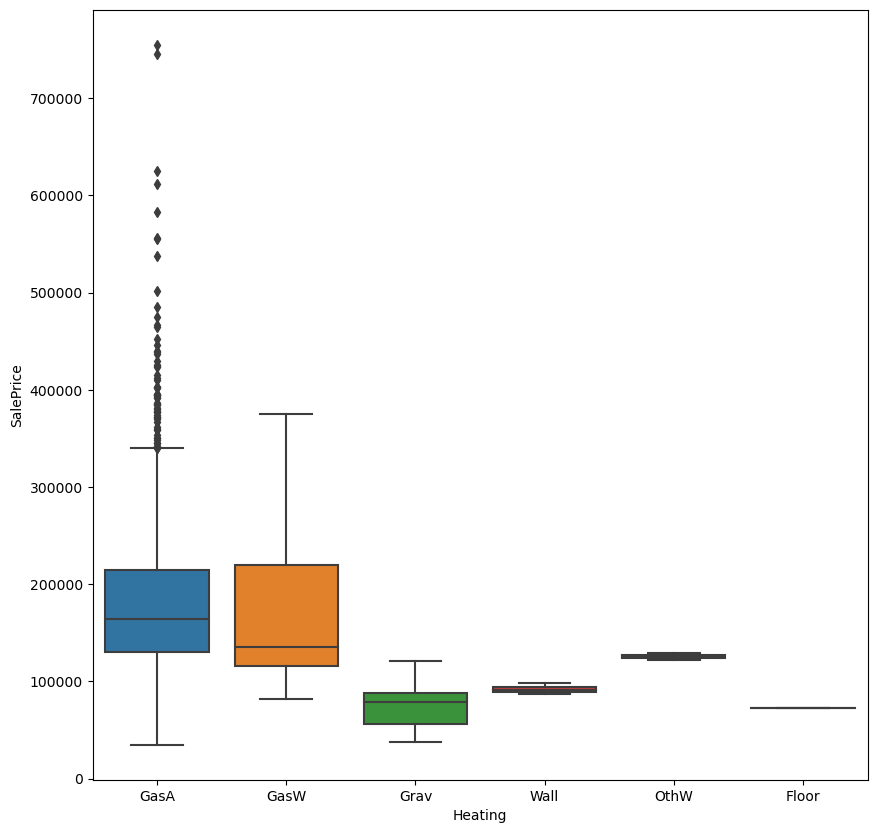

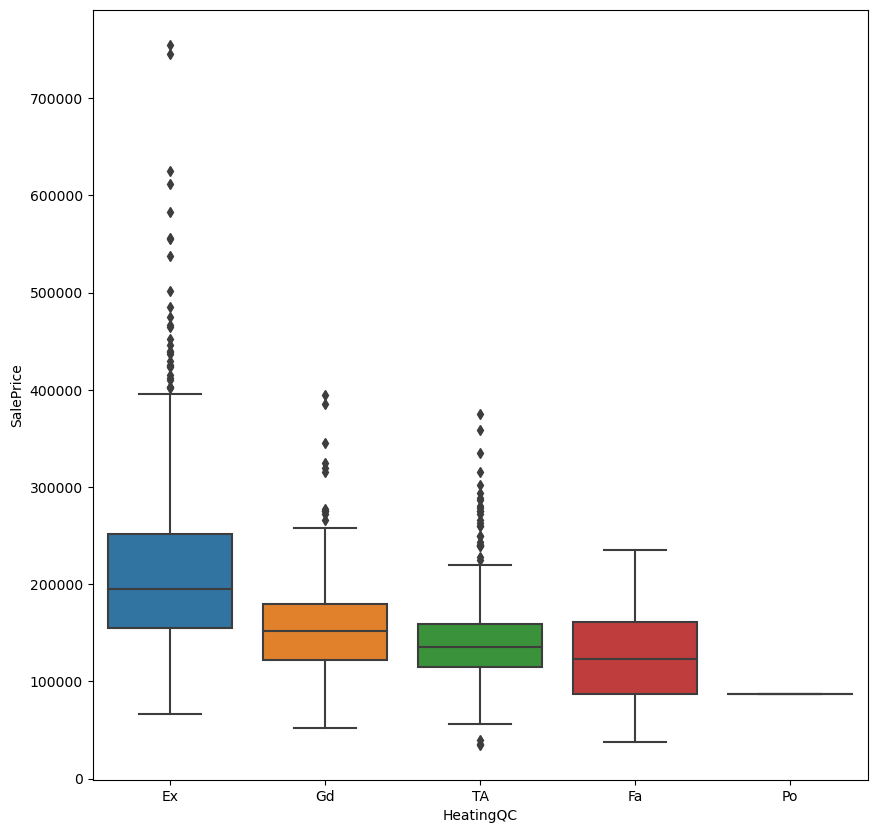

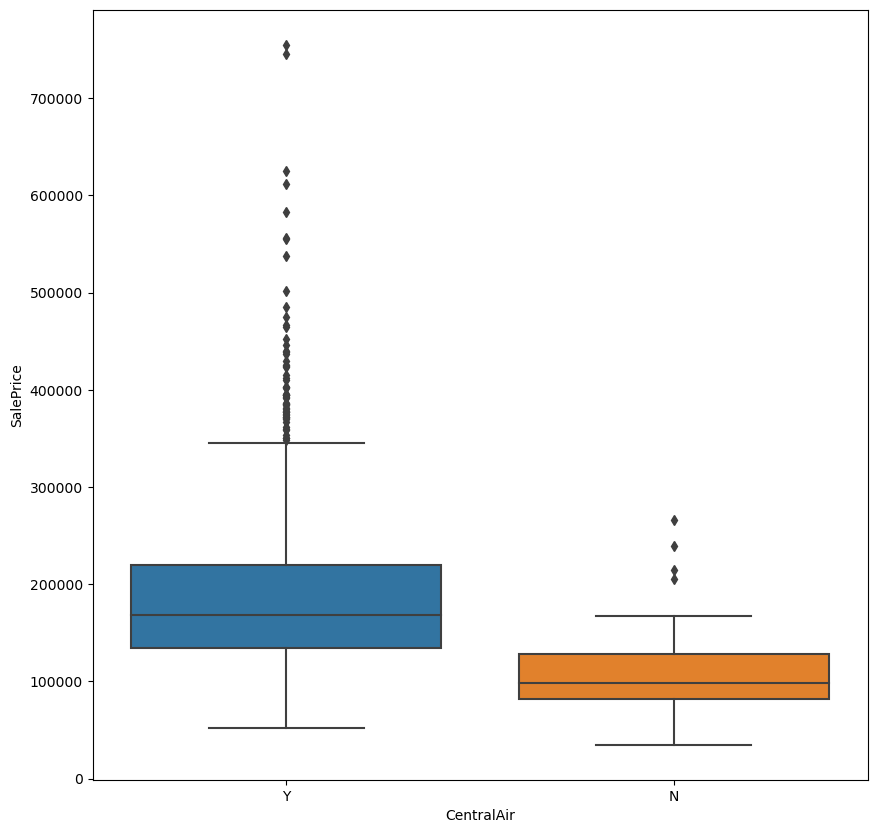

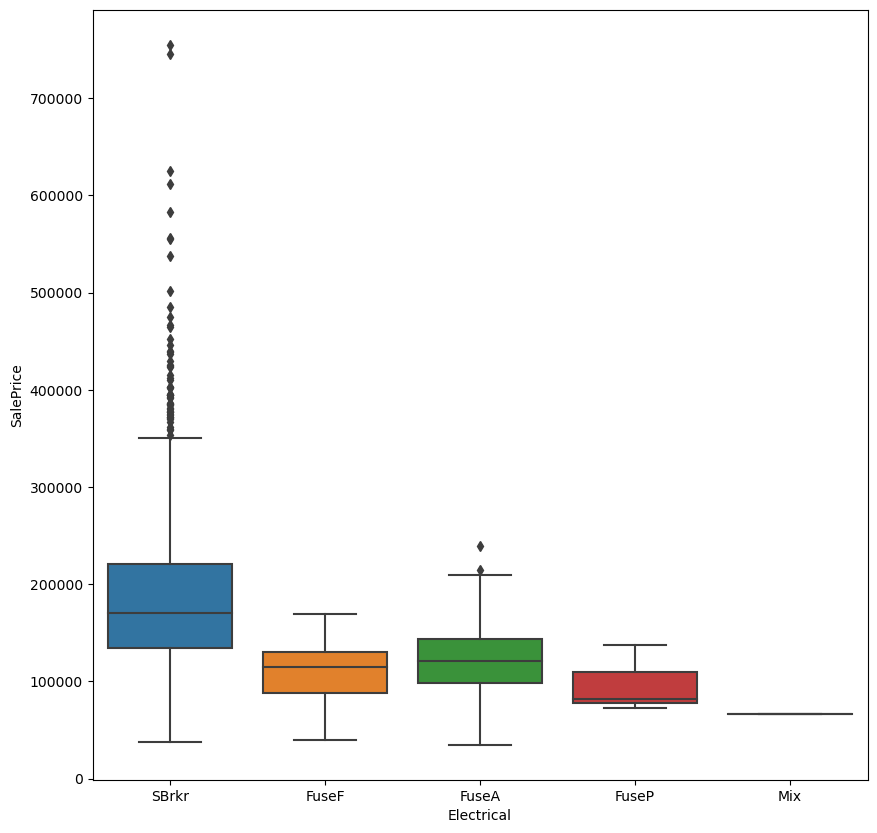

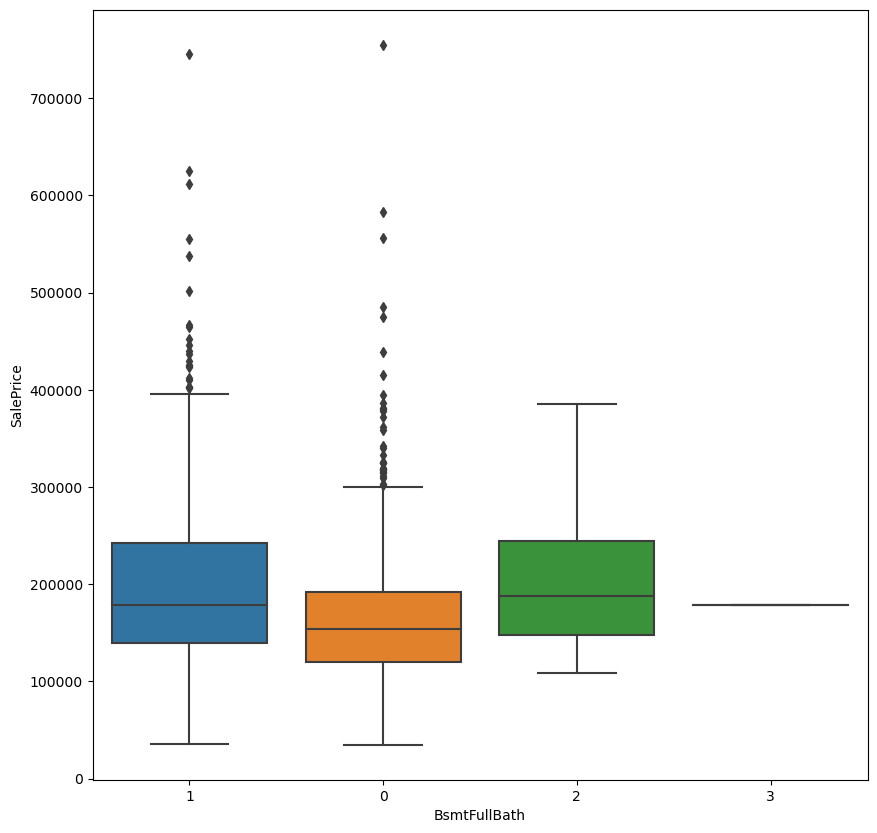

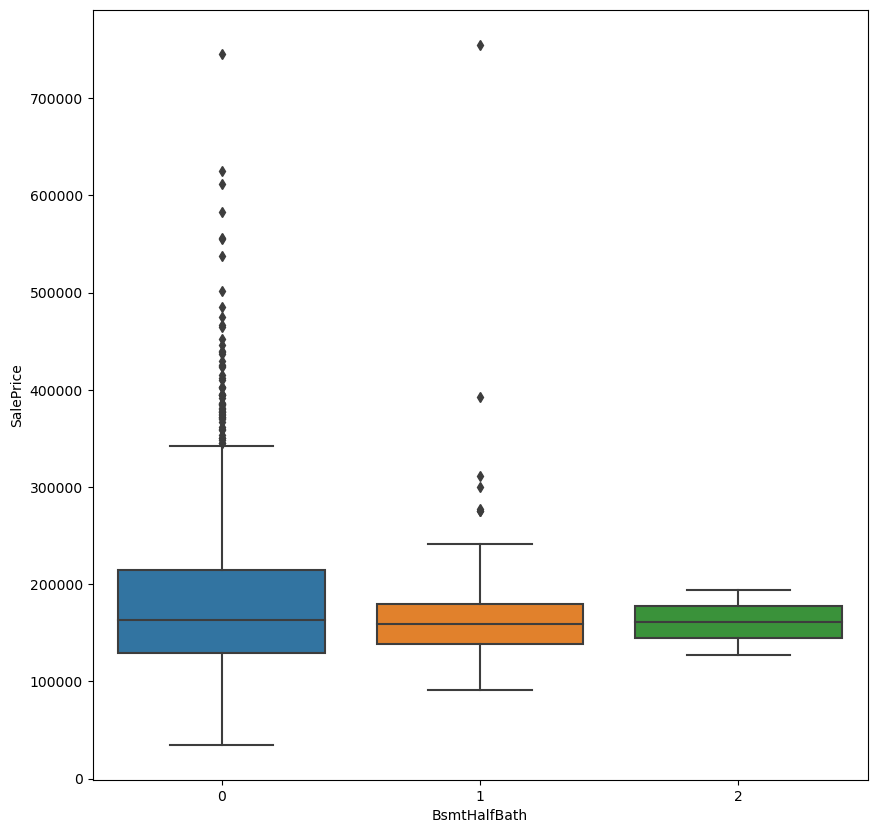

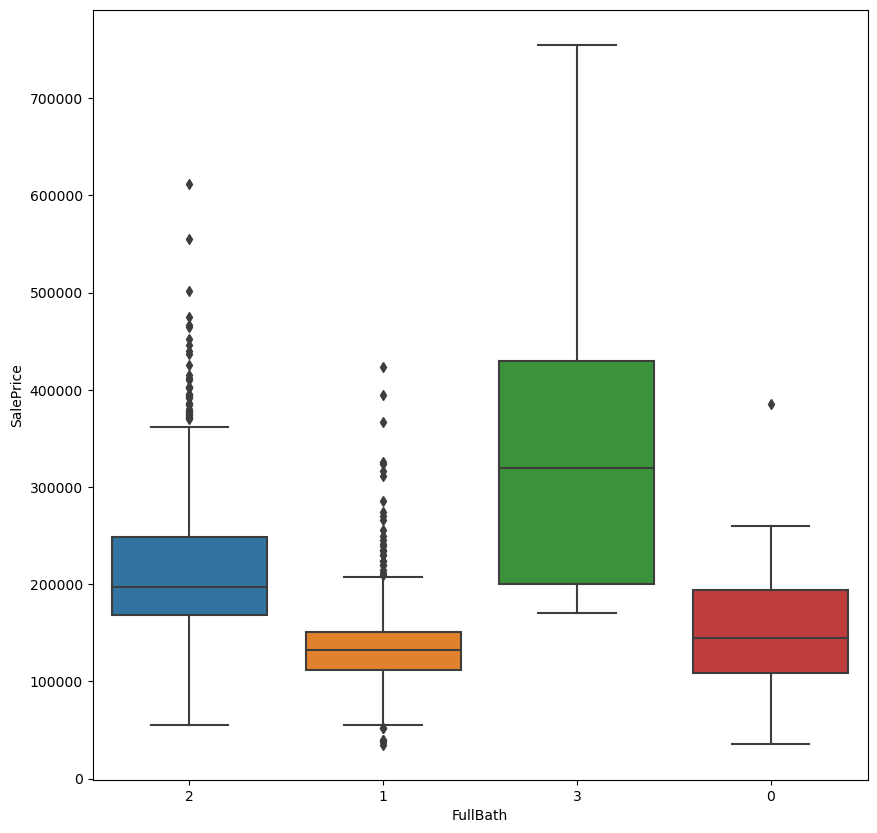

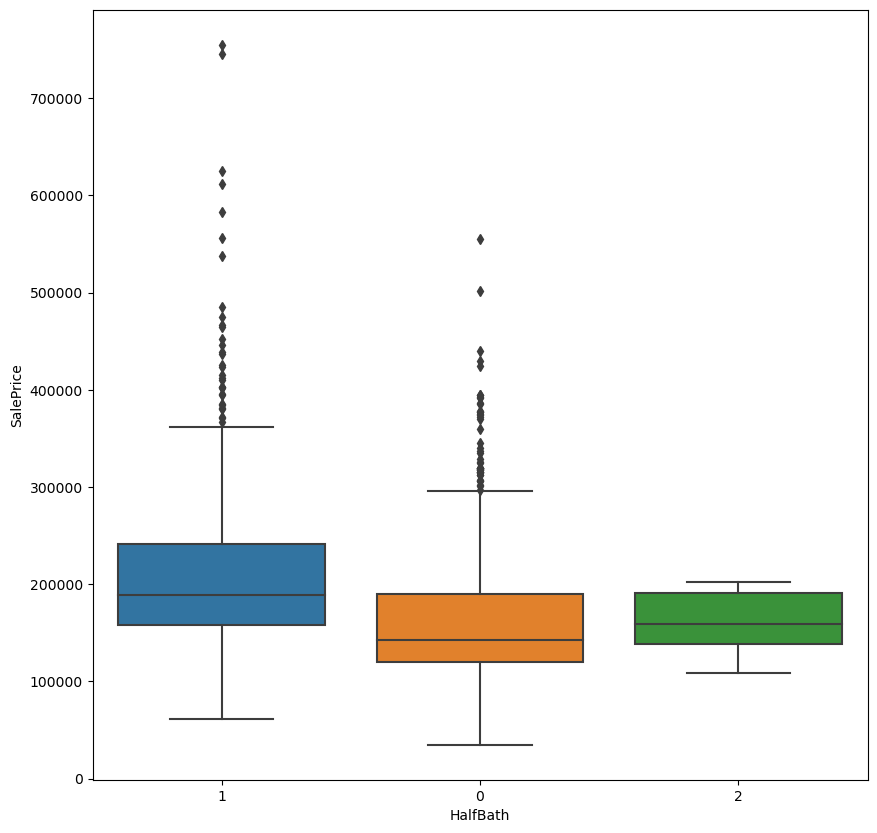

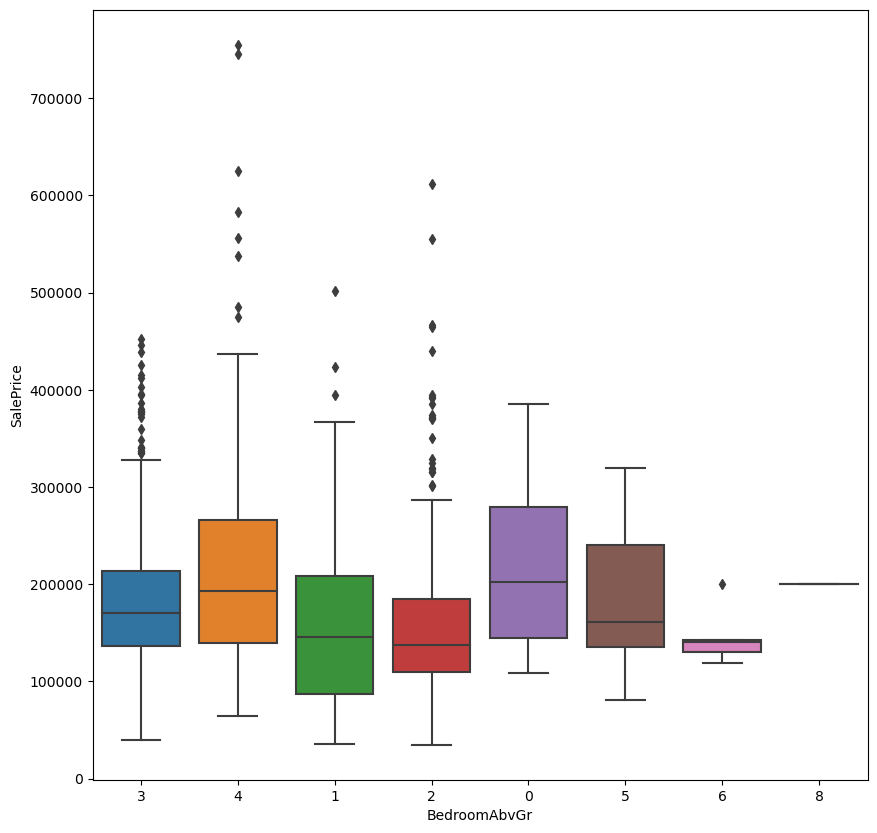

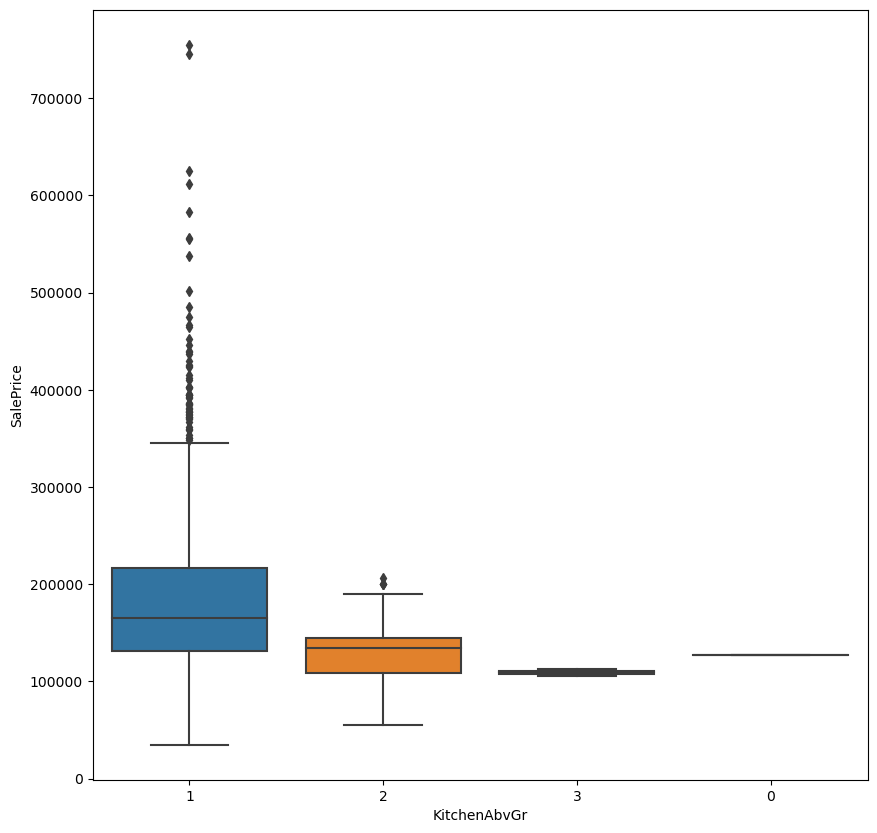

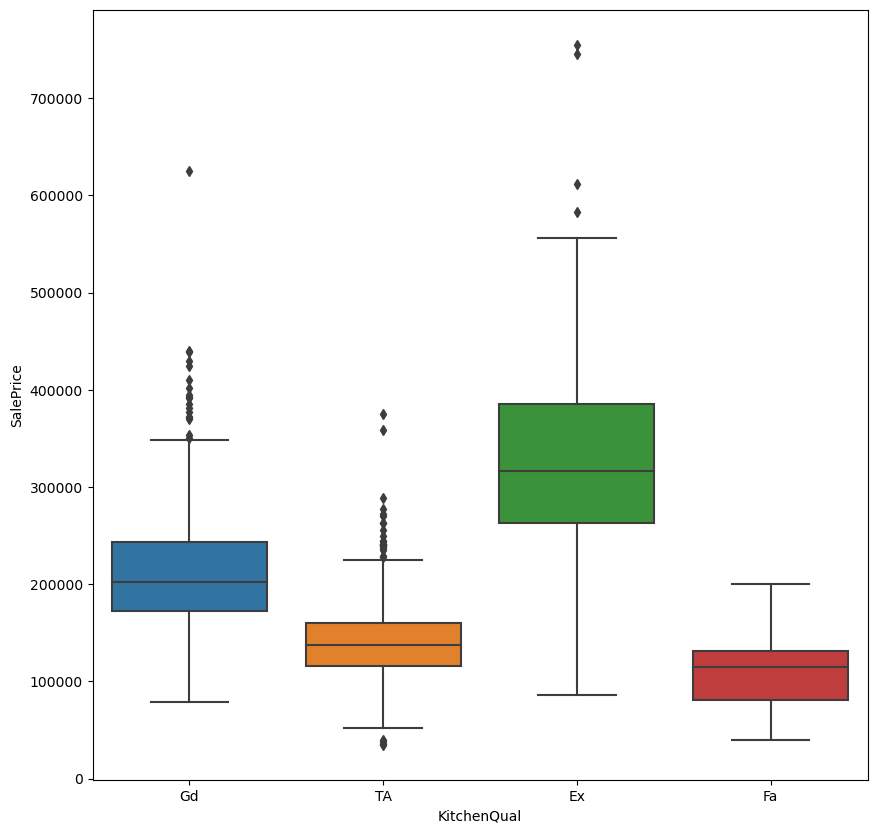

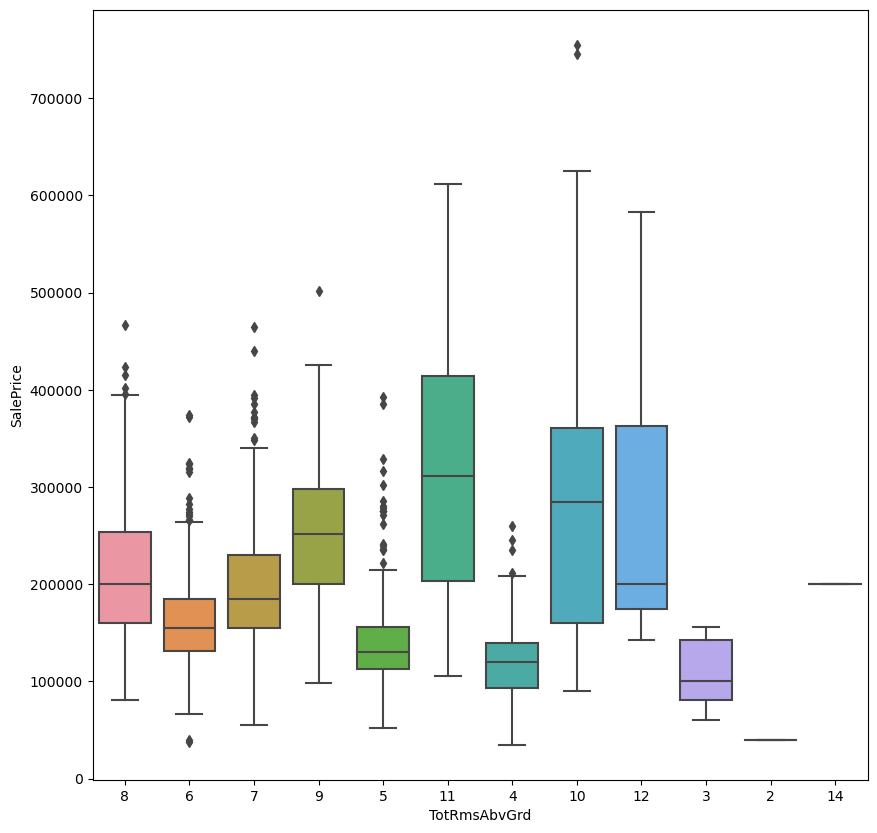

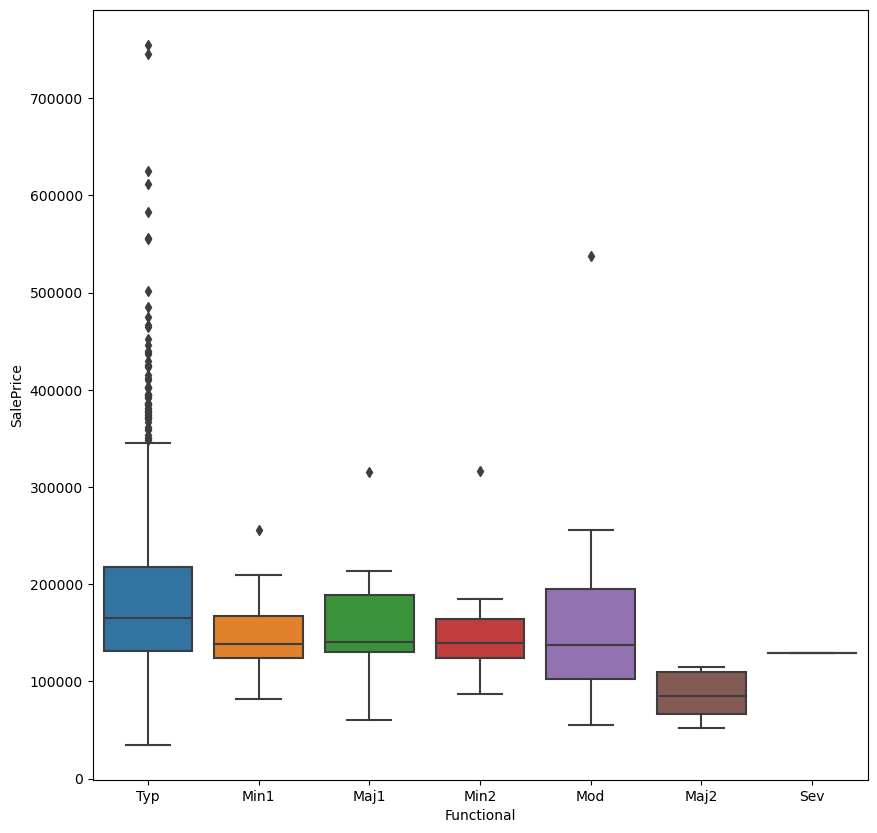

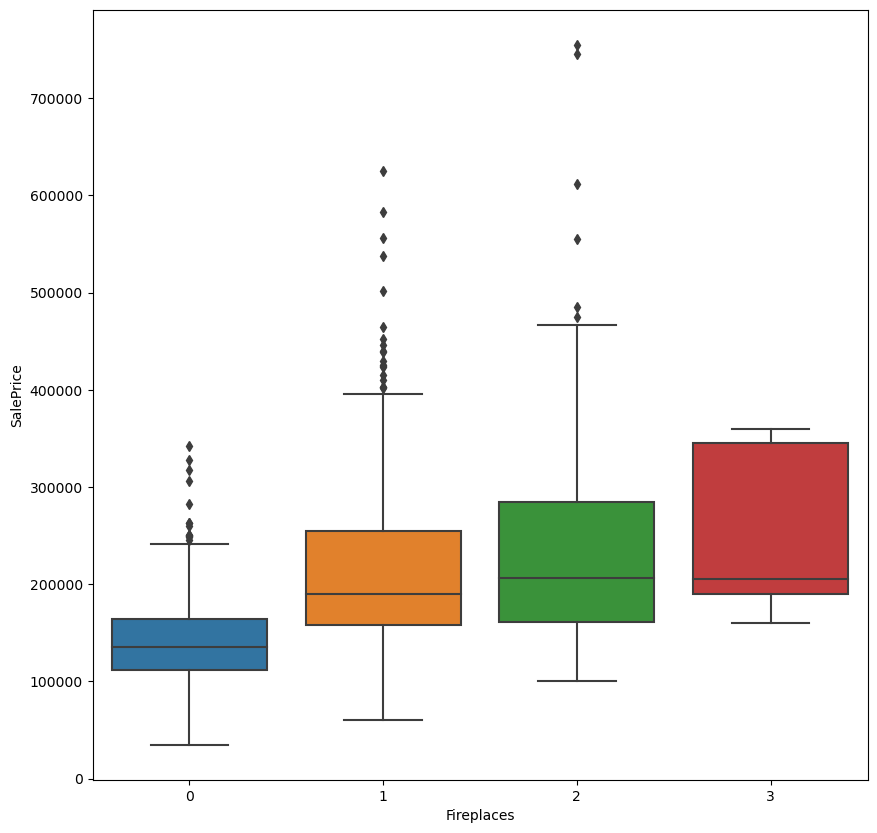

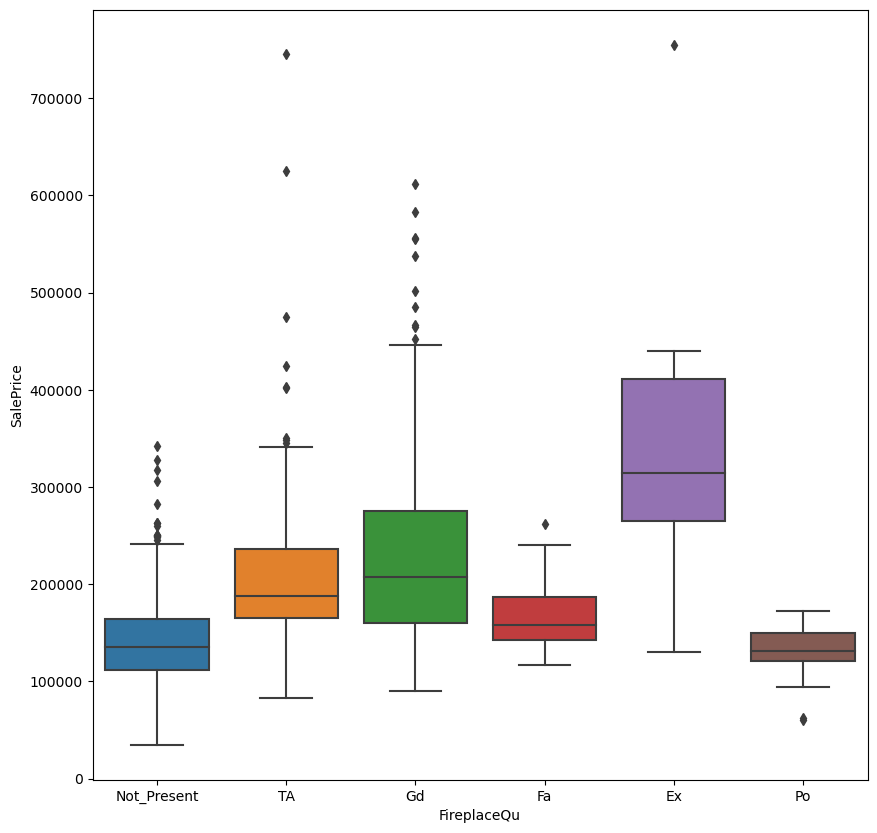

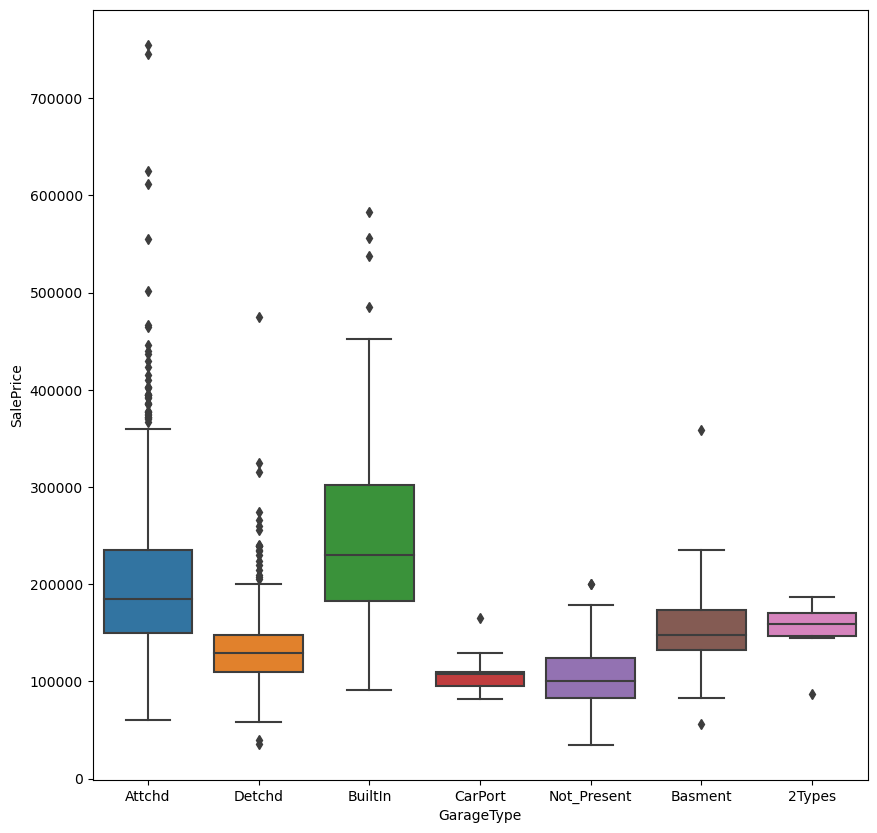

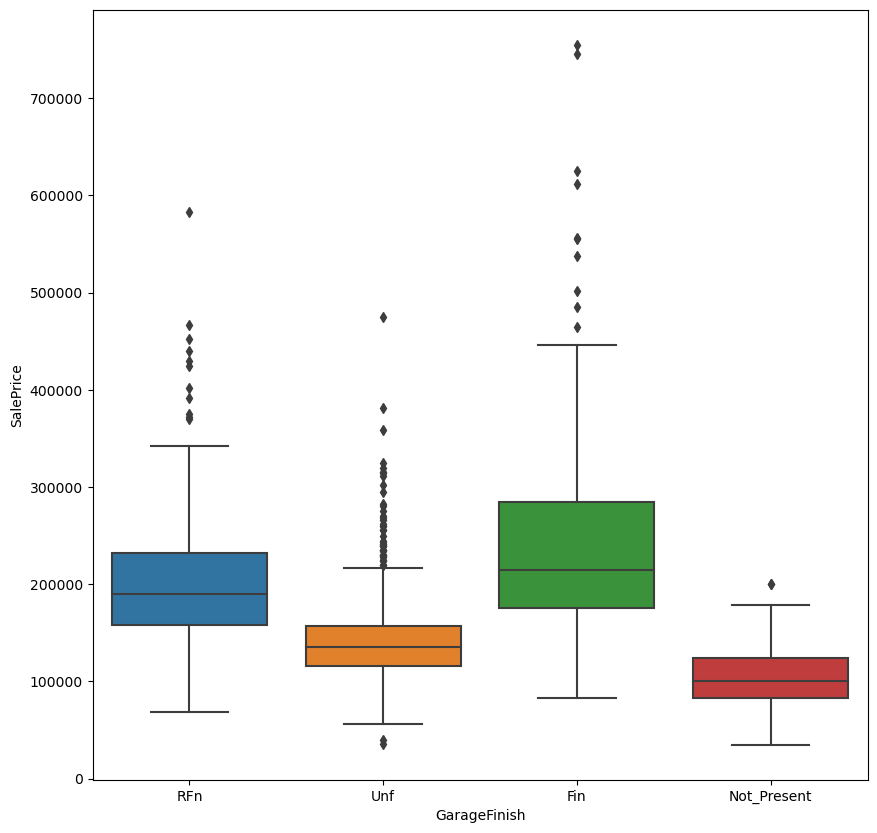

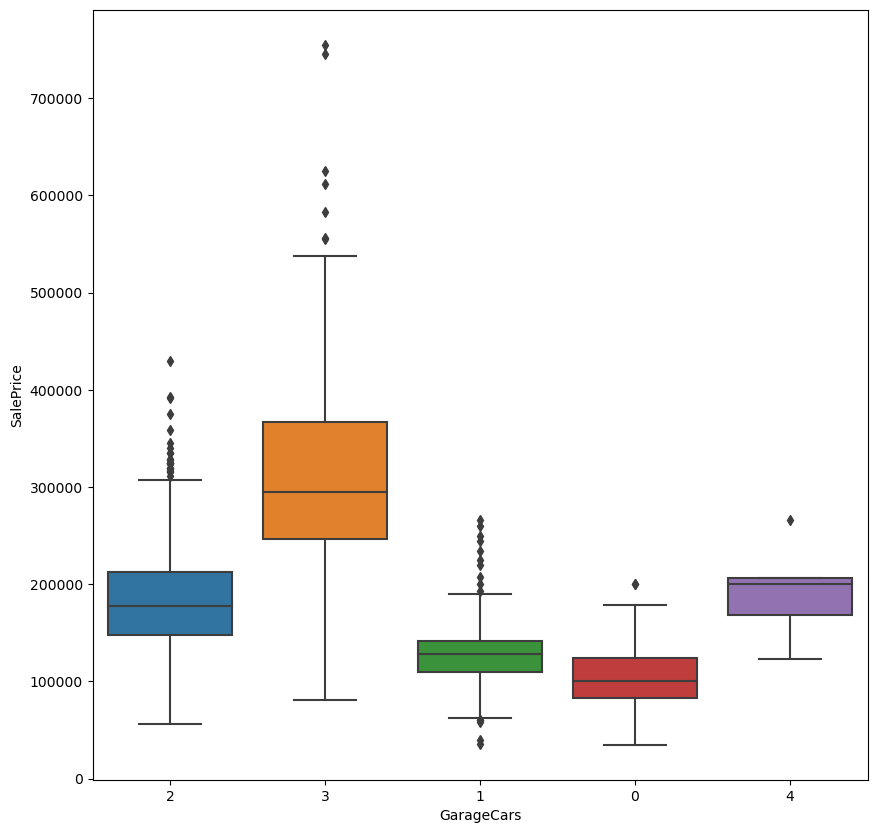

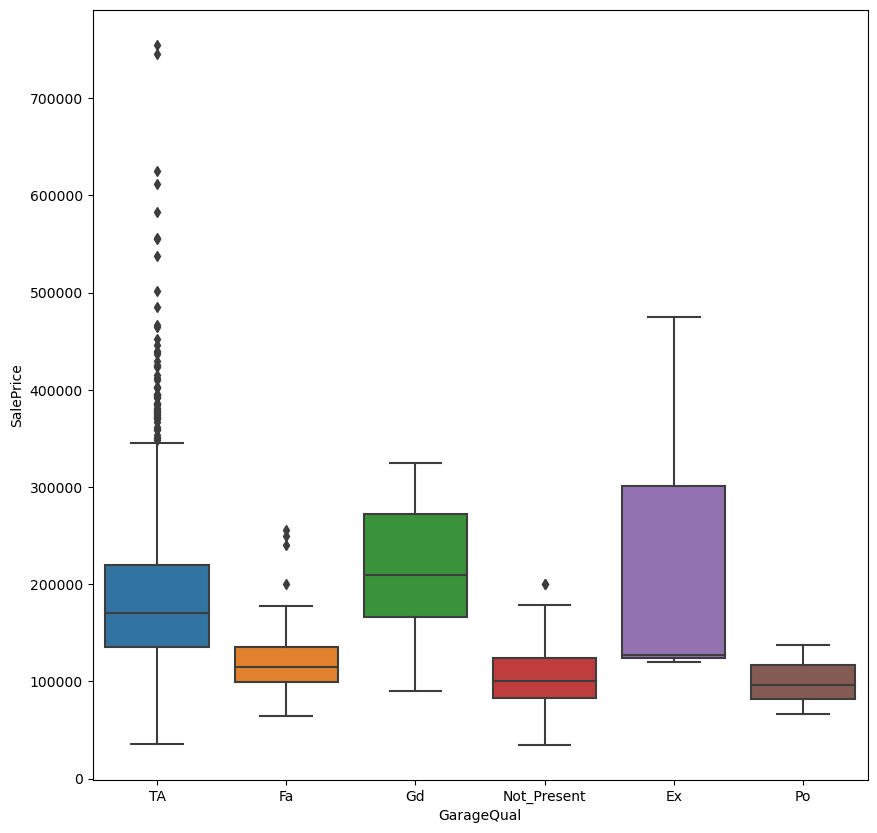

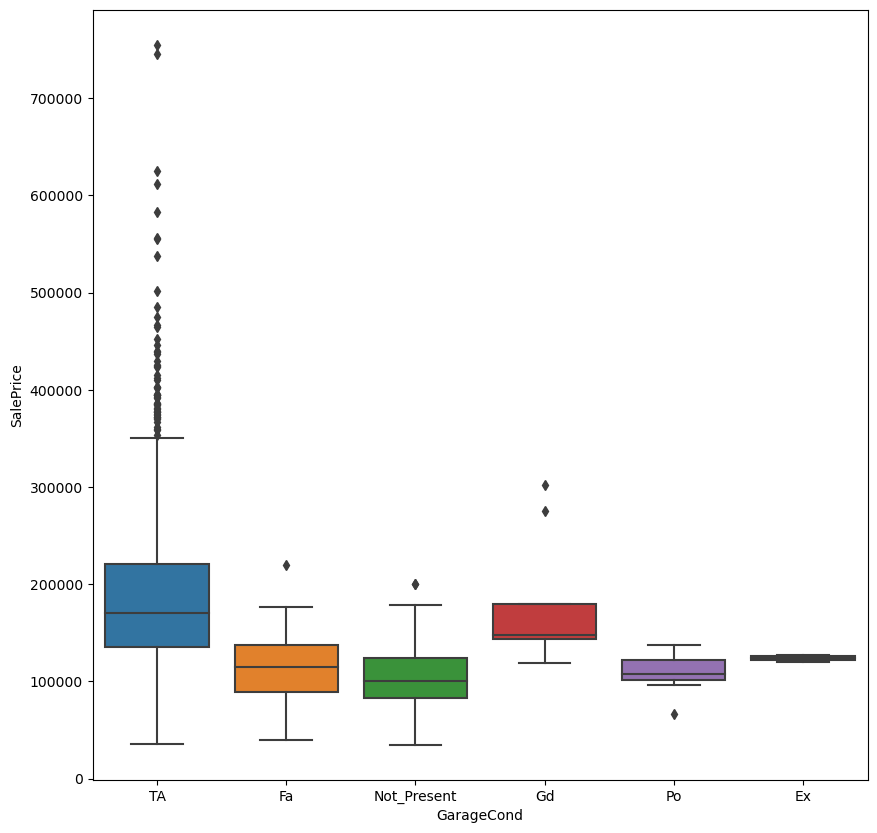

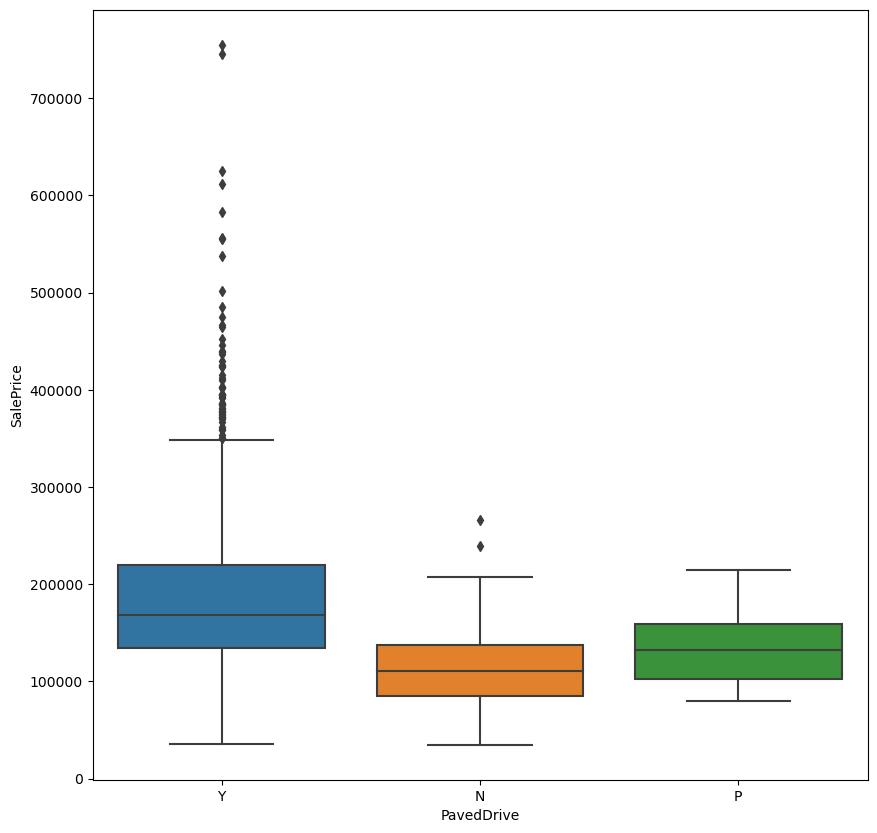

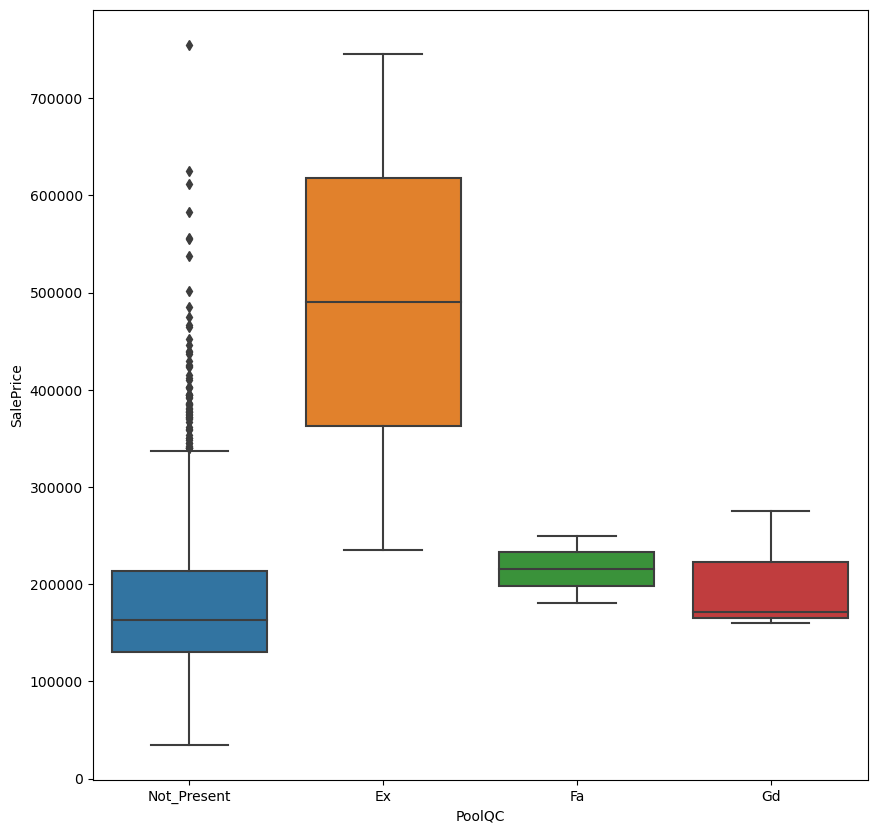

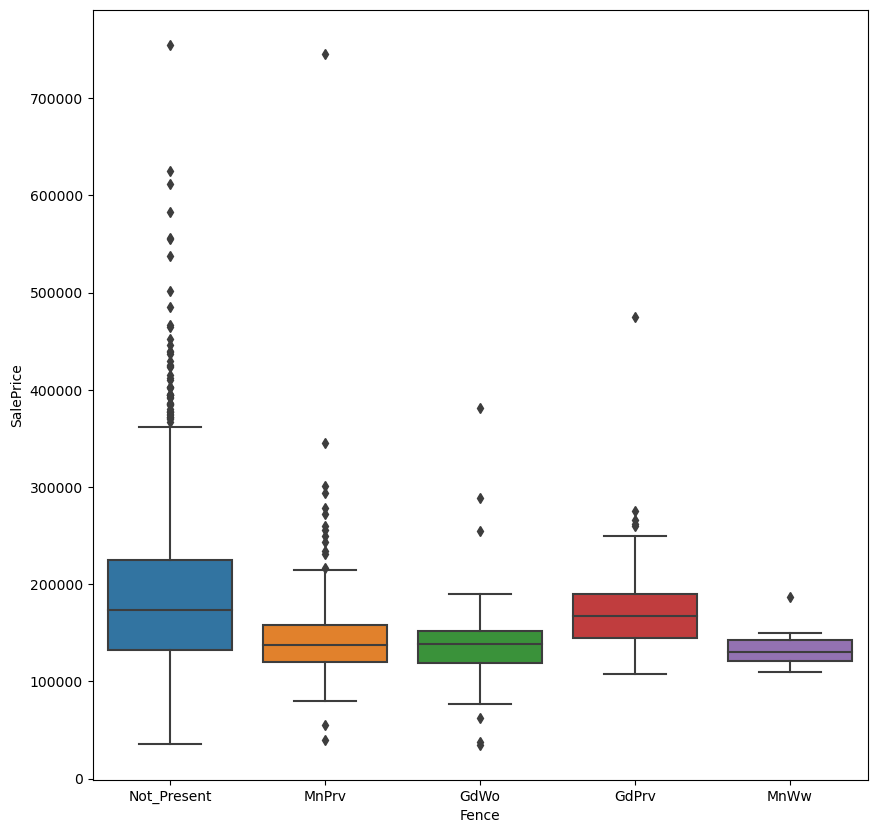

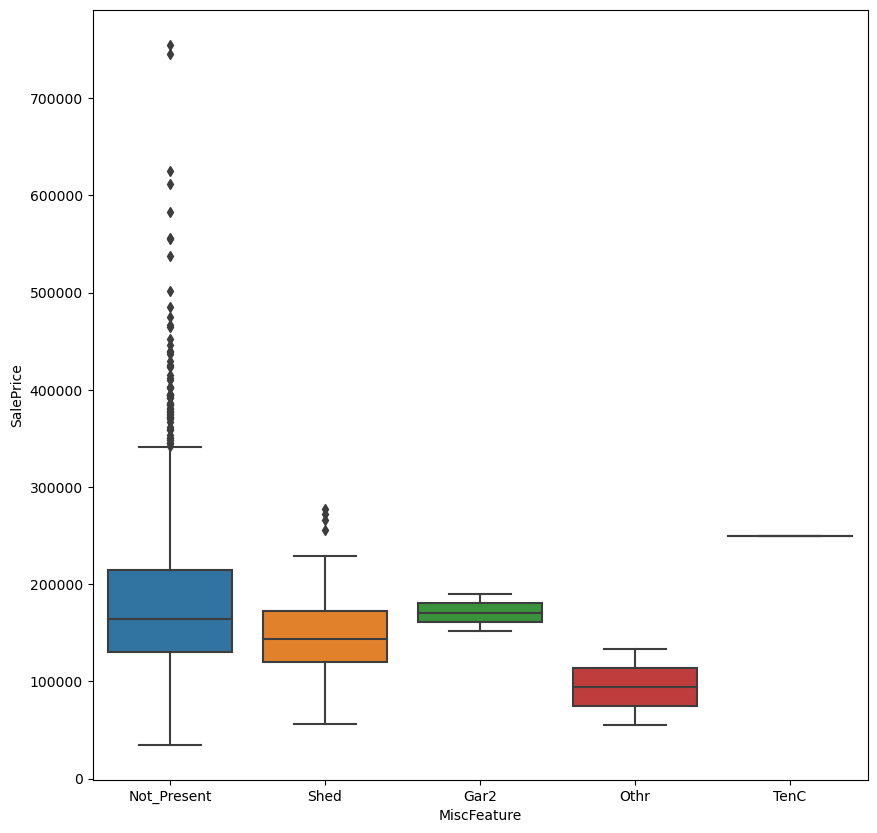

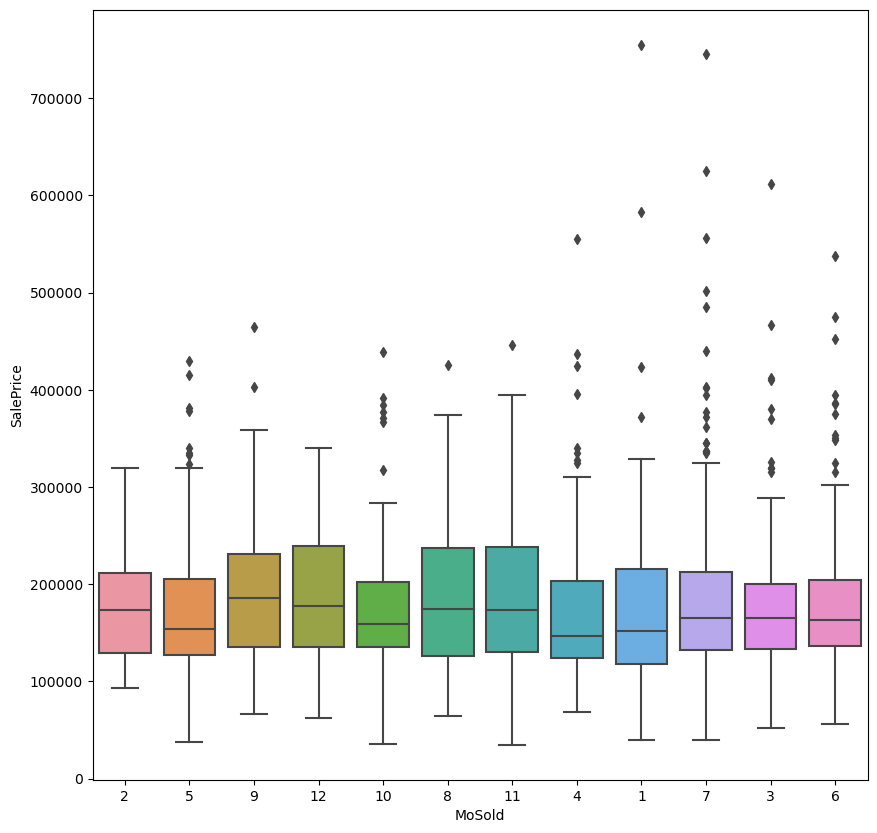

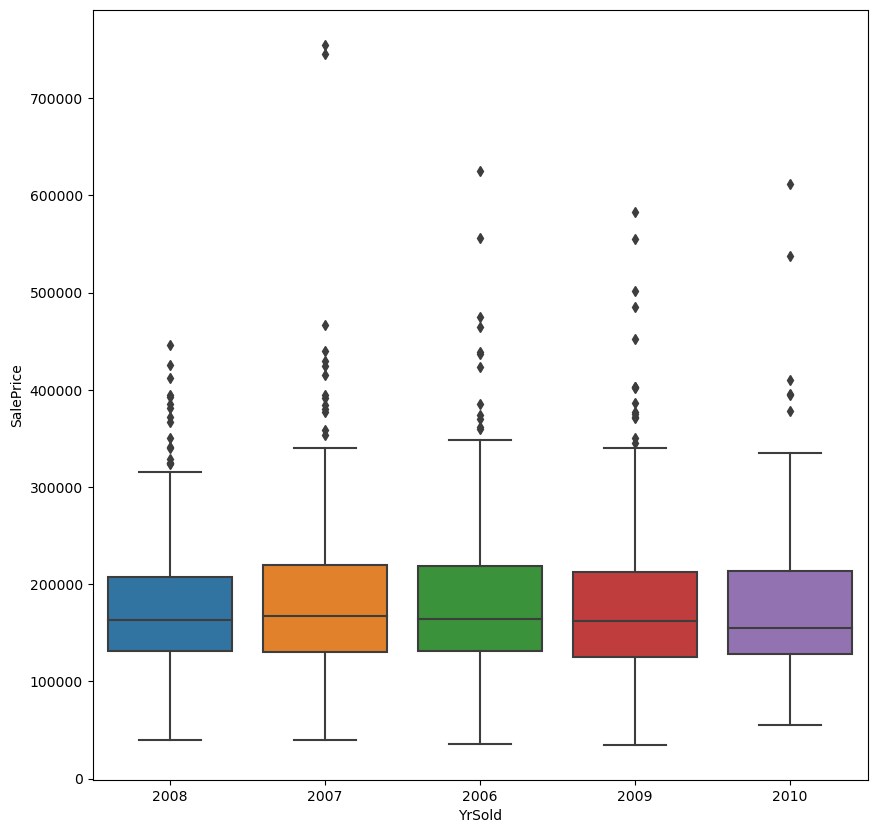

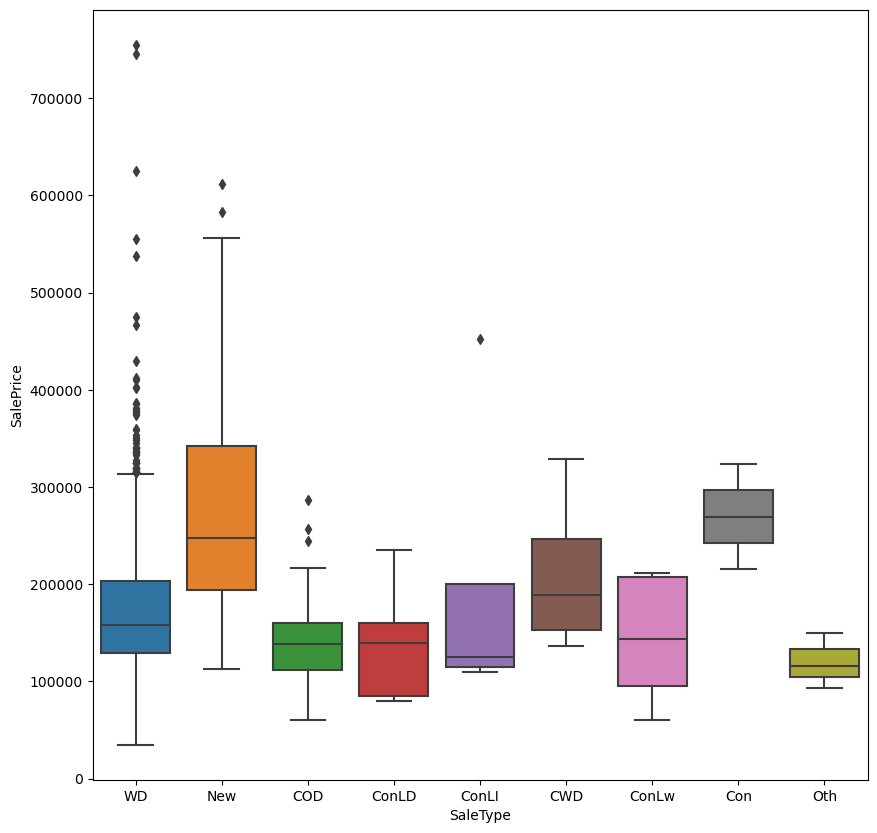

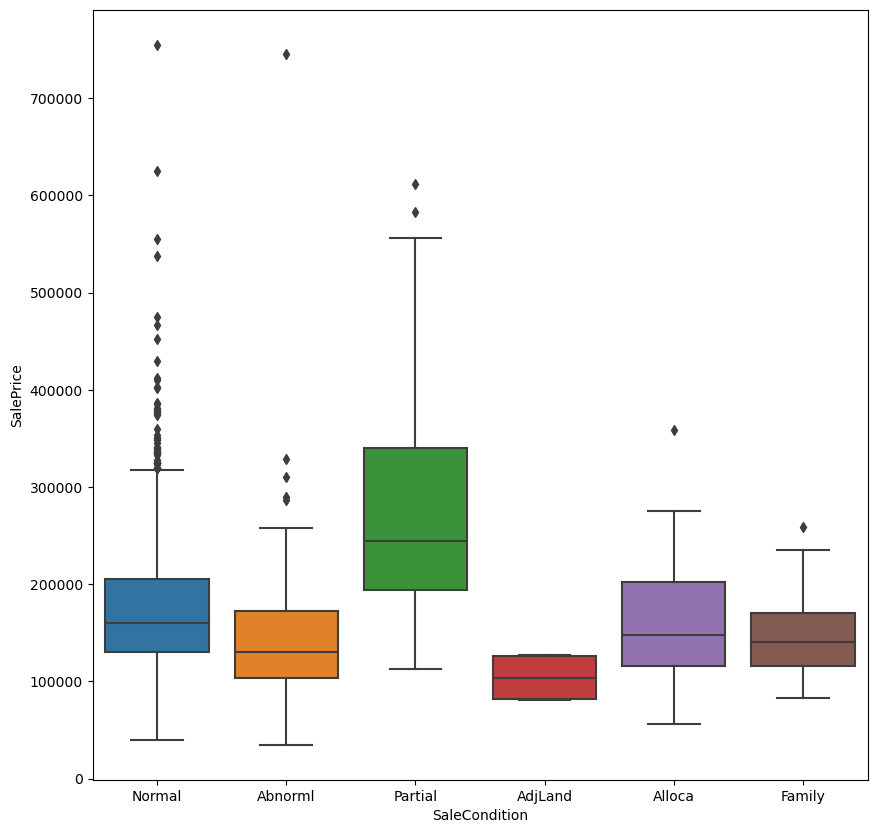

In [270]:
i=0

for col in cat_cols:
    plt.figure(figsize=(10,10))
   # plt.subplot(44,1,i)
    sns.boxplot(y=df['SalePrice'],x=df[col])
   # plt.close()
plt.show()

# Data Transformation

##### The target variable i.e. salesPrices is heavily skewed to the right therefore applying a log transformation in it

/var/folders/vt/zh6l1p3j34d906_4mtw69cfw0000gn/T/ipykernel_4087/1912756133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['SalePrice']))


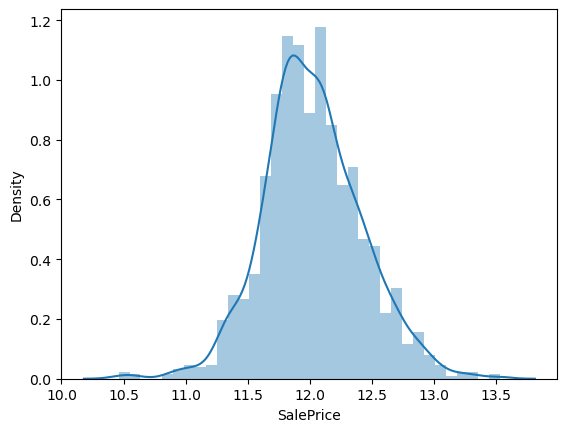

In [271]:
sns.distplot(np.log(df['SalePrice']))
plt.show()

In [272]:
df['SalePrice_trans']= np.log(df['SalePrice'])
df.drop(['SalePrice'], axis=1, inplace= True)

In [273]:
df.shape

(1459, 78)

In [274]:
for col in cat_cols:
    status = pd.get_dummies(df[col],dtype=int,drop_first=True,prefix=col)
    df = pd.concat([df, status],axis=1)
    df.drop(col, axis=1,inplace =True)

In [275]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 326 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    LotArea                   int64  
 1    YearBuilt                 int64  
 2    YearRemodAdd              int64  
 3    MasVnrArea                float64
 4    BsmtFinSF1                int64  
 5    BsmtFinSF2                int64  
 6    BsmtUnfSF                 int64  
 7    TotalBsmtSF               int64  
 8    1stFlrSF                  int64  
 9    2ndFlrSF                  int64  
 10   LowQualFinSF              int64  
 11   GrLivArea                 int64  
 12   GarageYrBlt               float64
 13   GarageArea                int64  
 14   WoodDeckSF                int64  
 15   OpenPorchSF               int64  
 16   EnclosedPorch             int64  
 17   3SsnPorch                 int64  
 18   ScreenPorch               int64  
 19   PoolArea                  int64  
 20   MiscVal    

### Below columns capture the same info therefore dropping the extras 

In [276]:
#BsmtQual_Not_Present,BsmtCond_Not_Present,BsmtExposure_Not_Present,BsmtFinType1_Not_Present
#BsmtFinType2_Not_Present,
#GarageType_Not_Present ,GarageFinish_Not_Present,GarageQual_Not_Present,GarageCond_Not_Present


In [277]:
df.drop(columns=['BsmtCond_Not_Present','BsmtExposure_Not_Present','BsmtFinType1_Not_Present',
                 'BsmtFinType2_Not_Present','GarageFinish_Not_Present',
                 'GarageQual_Not_Present','GarageCond_Not_Present'], axis=1, inplace=True)

In [278]:
df.rename(columns={'BsmtQual_Not_Present': 'No_Basement',
                   'GarageType_Not_Present': 'No_Garage',
                  'PoolQC_Not_Present':'No_Pool',
                  'Fence_Not_Present':'No_Fence',
                   'FireplaceQu_Not_Present':'No_fireplace',
                   'MiscFeature_Not_Present':'No_MiscFeature'}, inplace=True)


In [279]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 319 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    LotArea                1459 non-null   int64  
 1    YearBuilt              1459 non-null   int64  
 2    YearRemodAdd           1459 non-null   int64  
 3    MasVnrArea             1459 non-null   float64
 4    BsmtFinSF1             1459 non-null   int64  
 5    BsmtFinSF2             1459 non-null   int64  
 6    BsmtUnfSF              1459 non-null   int64  
 7    TotalBsmtSF            1459 non-null   int64  
 8    1stFlrSF               1459 non-null   int64  
 9    2ndFlrSF               1459 non-null   int64  
 10   LowQualFinSF           1459 non-null   int64  
 11   GrLivArea              1459 non-null   int64  
 12   GarageYrBlt            1459 non-null   float64
 13   GarageArea             1459 non-null   int64  
 14   WoodDeckSF             1459 non-null   int6

In [280]:
df_train,df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 319)
(438, 319)


## Scaling Numnerical Variables

In [281]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler(quantile_range=(2,98))

num_cols

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [282]:
num_cols=num_cols.drop(['SalePrice'])
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [283]:
df_test[num_cols]= scaler.fit_transform(df_test[num_cols])

In [284]:
df_train.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice_trans,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_Present,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,No_fireplace,Firep

In [285]:
y_train= df_train.pop('SalePrice_trans')
X_train= df_train

y_test=df_test.pop('SalePrice_trans')
X_test=df_test

## Linear Regression Modeling

In [286]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

In [287]:
from sklearn.metrics import r2_score, mean_squared_error


## RidgeRegression

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
params={'alpha':[0.0001,0.001,0.01,0.5,0.1,
                 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                 4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}

ridge = Ridge()

folds =5
model_cv= GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [290]:
model_cv.best_estimator_

Ridge(alpha=5.0)

In [291]:
model_cv.best_score_

-0.09368418710931588

In [292]:
ridge_model= model_cv.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=5.0)

In [293]:
y_train_pred= ridge_model.predict(X_train)

In [294]:
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))

r2 score on training dataset: 0.9376568298989788


In [295]:
y_test_pred= ridge_model.predict(X_test)
print( 'r2 score on test dataset:', r2_score(y_test, y_test_pred))

r2 score on test dataset: 0.8638191803029045


In [296]:
ridge_coef_df= pd.Series(ridge_model.coef_, index=X_train.columns)
ridge_coef_df

LotArea                  0.043956
YearBuilt                0.085102
YearRemodAdd             0.064620
MasVnrArea               0.014156
BsmtFinSF1               0.037898
BsmtFinSF2               0.045322
BsmtUnfSF                0.016110
TotalBsmtSF              0.054428
1stFlrSF                 0.132670
2ndFlrSF                 0.149169
LowQualFinSF             0.000091
GrLivArea                0.198274
GarageYrBlt              0.028518
GarageArea               0.047825
WoodDeckSF               0.049790
OpenPorchSF              0.009932
EnclosedPorch            0.012651
3SsnPorch                0.000275
ScreenPorch              0.045216
PoolArea                -0.000538
MiscVal                  0.003468
MSSubClass_160          -0.078523
MSSubClass_180          -0.026403
MSSubClass_190          -0.006626
MSSubClass_20            0.032290
MSSubClass_30           -0.049617
MSSubClass_40           -0.009575
MSSubClass_45            0.016304
MSSubClass_50            0.006670
MSSubClass_60 

In [297]:
ridge_coef_df[abs(ridge_coef_df).nlargest(25).index]

GrLivArea               0.198274
PoolQC_Gd              -0.156467
2ndFlrSF                0.149169
OverallQual_9           0.144187
1stFlrSF                0.132670
OverallCond_3          -0.121650
Condition2_PosN        -0.120071
Neighborhood_MeadowV   -0.109299
Neighborhood_Crawfor    0.107658
Neighborhood_StoneBr    0.107001
MSZoning_FV             0.097954
Neighborhood_IDOTRR    -0.094820
OverallQual_2          -0.092418
Neighborhood_NridgHt    0.091368
MSZoning_RL             0.090989
FullBath_3              0.090434
Fireplaces_3           -0.087139
YearBuilt               0.085102
MSZoning_RH             0.084765
Exterior1st_BrkFace     0.084618
TotRmsAbvGrd_12        -0.081871
Fireplaces_2            0.079677
No_Basement            -0.079629
MSSubClass_160         -0.078523
Neighborhood_Edwards   -0.077596
dtype: float64

## Lasso Regression

In [298]:
params={'alpha':[0.0001,0.001,0.01,0.5,0.1,
                 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                 4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
lasso = Lasso()

folds =5
model_cv_lasso= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/payal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+00, tolerance: 1.333e-02
  model = cd_fast.enet_coordinate_descent(
/Users/payal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e-02, tolerance: 1.303e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [299]:
model_cv_lasso.best_estimator_

Lasso(alpha=0.0001)

In [300]:
lasso_model=model_cv_lasso.best_estimator_
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [301]:
y_train_pred=lasso_model.predict(X_train)

In [302]:
y_test_pred =lasso_model.predict(X_test)

In [303]:
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))

r2 score on training dataset: 0.9558191711955127


In [304]:
print( 'r2 score on training dataset:', r2_score(y_test, y_test_pred))

r2 score on training dataset: 0.6988447157743236


In [305]:
lasso_coef_df= pd.Series(lasso_model.coef_, index=X_train.columns)
imp_features = lasso_coef_df[lasso_coef_df !=0]
print(len(imp_features))
print(X_train.shape[1])

227
318


In [306]:
lasso_coef_df[abs(lasso_coef_df).nlargest(25).index]

PoolQC_Gd              -2.271100
Condition2_PosN        -0.690752
GrLivArea               0.513688
MSZoning_FV             0.369076
MSZoning_RH             0.358757
MSZoning_RL             0.338731
MSZoning_RM             0.309327
BsmtFullBath_3          0.204576
YearBuilt               0.179746
OverallQual_9           0.176137
Neighborhood_MeadowV   -0.170346
Functional_Sev         -0.151170
OverallCond_3          -0.146296
Neighborhood_Crawfor    0.145694
OverallQual_10          0.135755
GarageArea              0.130638
Neighborhood_StoneBr    0.127173
Exterior1st_BrkComm    -0.126767
Foundation_Wood        -0.124276
TotRmsAbvGrd_11        -0.123769
OverallQual_2          -0.123204
SaleType_ConLD          0.119684
TotalBsmtSF             0.105162
Neighborhood_ClearCr    0.096465
MSSubClass_160         -0.093567
dtype: float64

## Onservations

- Ridge r2 score test data =0.8638191803029045
- Lasso r2 score test data =0.6988447157743236

#### Since ridge r2 score is way better than lasso we chose ridge as the final model


## Subjective Questions

### Doubling the optimal Values

- Ridge 

In [307]:
# optimal value =5.0
params={'alpha':[10]}

ridge = Ridge()

folds =5
model_cv= GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [308]:
ridge_model = model_cv.best_estimator_

In [309]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [310]:
y_train_pred= ridge_model.predict(X_train)

In [311]:
r2_score(y_train,y_train_pred)

0.9301250904510234

In [312]:
y_test_pred = ridge_model.predict(X_test)
r2_score(y_test,y_test_pred)

0.8637599413960301

  - important variables

In [313]:
ridge_coef_df =pd.Series(ridge_model.coef_, index=X_train.columns)
ridge_coef_df[abs(ridge_coef_df).nlargest(25).index]

GrLivArea               0.172556
2ndFlrSF                0.123893
OverallQual_9           0.123664
1stFlrSF                0.120617
OverallCond_3          -0.105072
Neighborhood_Crawfor    0.094670
PoolQC_Gd              -0.089280
Neighborhood_StoneBr    0.083046
FullBath_3              0.082072
Neighborhood_NridgHt    0.082009
Neighborhood_IDOTRR    -0.081145
Neighborhood_MeadowV   -0.080995
Neighborhood_Edwards   -0.075309
Exterior1st_BrkFace     0.073822
CentralAir_Y            0.072934
Fireplaces_2            0.072477
OverallQual_8           0.070222
Condition2_PosN        -0.069660
YearRemodAdd            0.069474
MSZoning_FV             0.066372
OverallQual_2          -0.065119
MSSubClass_160         -0.064897
TotRmsAbvGrd_4         -0.064572
TotalBsmtSF             0.063403
BsmtExposure_Gd         0.063103
dtype: float64

- Lasso

In [314]:
# optimal value =0.0001
params={'alpha':[0.0002]}

lasso = Lasso()

folds =5
model_cv_lasso_2= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv_lasso_2.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.0002]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [315]:
lasso_model2= model_cv_lasso_2.best_estimator_

In [316]:
y_train_pred=lasso_model2.predict(X_train)

In [317]:
r2_score(y_train_pred,y_train)

0.9473621836042472

In [318]:
y_test_pred=lasso_model2.predict(X_test)

In [319]:
r2_score(y_test_pred, y_test)

0.7261997831010572

In [320]:
lasso_coef_df =pd.Series(lasso_model2.coef_, index=X_train.columns)
lasso_coef_df[abs(lasso_coef_df).nlargest(25).index]

PoolQC_Gd              -2.028102
Condition2_PosN        -0.590742
GrLivArea               0.501352
MSZoning_FV             0.278989
MSZoning_RH             0.268168
MSZoning_RL             0.255455
MSZoning_RM             0.227035
OverallQual_9           0.183993
OverallCond_3          -0.168961
Neighborhood_MeadowV   -0.162031
YearBuilt               0.157446
Neighborhood_Crawfor    0.142203
OverallQual_10          0.137254
GarageArea              0.127954
Neighborhood_StoneBr    0.113861
TotRmsAbvGrd_11        -0.110741
TotalBsmtSF             0.107702
OverallQual_2          -0.097468
Neighborhood_ClearCr    0.095473
OverallQual_8           0.089644
Exterior1st_BrkFace     0.085575
MSSubClass_160         -0.083568
SaleType_ConLD          0.080372
BsmtFinSF1              0.076887
Neighborhood_NridgHt    0.075438
dtype: float64

## Dropping  5 most important variables from lasso

In [321]:
# PoolQC_Gd              -2.271100
# Condition2_PosN        -0.690752
# GrLivArea               0.513688
# MSZoning_FV             0.369076
# MSZoning_RH             0.358757

In [328]:
X_train =X_train.drop(['PoolQC_Gd','Condition2_PosN','GrLivArea','MSZoning_FV','MSZoning_RH'],axis=1)




KeyError: "['PoolQC_Gd', 'Condition2_PosN', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH'] not found in axis"

In [327]:

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [329]:
lasso_model3= model_cv_lasso.best_estimator_
lasso_model3

Lasso(alpha=0.001)

In [330]:
best_features = pd.Series(lasso_model3.coef_, index= X_train.columns)
best_features

LotArea                  0.031483
YearBuilt                0.062263
YearRemodAdd             0.087044
MasVnrArea               0.000813
BsmtFinSF1               0.000000
BsmtFinSF2               0.000000
BsmtUnfSF                0.000000
TotalBsmtSF              0.108085
1stFlrSF                 0.323556
2ndFlrSF                 0.278413
LowQualFinSF             0.000142
GarageYrBlt              0.000000
GarageArea               0.082151
WoodDeckSF               0.039631
OpenPorchSF              0.000000
EnclosedPorch            0.000000
3SsnPorch                0.000203
ScreenPorch              0.024074
PoolArea                -0.000829
MiscVal                  0.000000
MSSubClass_160          -0.062437
MSSubClass_180          -0.000000
MSSubClass_190          -0.000000
MSSubClass_20            0.027538
MSSubClass_30           -0.073524
MSSubClass_40           -0.000000
MSSubClass_45            0.000000
MSSubClass_50            0.000000
MSSubClass_60           -0.000000
MSSubClass_70 

In [331]:
best_features[abs(best_features).nlargest(25).index]

1stFlrSF                0.323556
2ndFlrSF                0.278413
OverallQual_9           0.181664
OverallCond_3          -0.177974
Neighborhood_MeadowV   -0.118373
Neighborhood_Crawfor    0.114694
TotalBsmtSF             0.108085
Neighborhood_NridgHt    0.097368
OverallQual_8           0.092377
CentralAir_Y            0.091687
Fireplaces_2            0.089322
YearRemodAdd            0.087044
Neighborhood_Somerst    0.084293
GarageArea              0.082151
BsmtExposure_Gd         0.078330
Neighborhood_IDOTRR    -0.074830
MSSubClass_30          -0.073524
FullBath_3              0.071290
Exterior1st_BrkFace     0.069741
Neighborhood_StoneBr    0.065255
Functional_Typ          0.063363
OverallCond_4          -0.063191
Neighborhood_Edwards   -0.062556
MSSubClass_160         -0.062437
YearBuilt               0.062263
dtype: float64